# Simple CNN for compare default parameters in further applications
#### Previous adversial ensemble network will be created in another file

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" #If using Matplotlib on Windows with different versions, this will surpress error
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import statistics 
from scipy import ndimage #Image Smoothing
from collections import Counter
import foolbox as fb
from torch.autograd import Variable
device = torch.device("cpu")
import sys
sys.path.append('../src/functions')
from clean_nn_weights import reset_weights    

#Git merge main/main master

Define dataloader parameter

In [2]:
batch_size_train = 32
batch_size_test = 32
random_seed = 1337
torch.backends.cudnn.enabled = True
torch.backends.cudnn.deterministic = True
torch.manual_seed(random_seed)  #Static random seed for reproducibility

Load MNIST Dataset from torchvision

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True, drop_last=True,worker_init_fn=random_seed)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True,drop_last=True,worker_init_fn=random_seed)

Load CIFAR10 Da taset from torchvision

In [21]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('../data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                              torchvision.transforms.Normalize(
                                 (0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
                                torchvision.transforms.Resize(size=(28,28))
                             ])),
  batch_size=batch_size_train, shuffle=True, drop_last=True,worker_init_fn=random_seed)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('../data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
                                torchvision.transforms.Resize(size=(28,28))
                             ])),
  batch_size=batch_size_test, shuffle=True,drop_last=True,worker_init_fn=random_seed)

Files already downloaded and verified
Files already downloaded and verified


#### Quick analysis of class balances

Min: 0.0006402533035725355
Max: 1.0
0.9993597


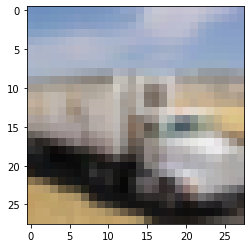

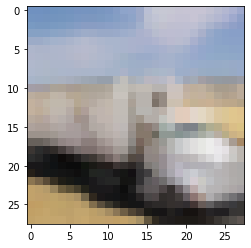

In [43]:
x_d,e_d=extract_dataloader_images(0)
f_d=torch.clone(x_d)
p_d=torch.clone(x_d)
print("Min: {}".format(min(np.ravel(x_d))))
print("Max: {}".format(max(np.ravel(x_d))))
print(abs(min(np.ravel(x_d))-max(np.ravel(x_d))))
#img = np.transpose(img, axes=[1, 2, 0])  # Put the 0-th dimension at the end
    
    # Image are supposed to be unsigned 8-bit integers. If we keep the raw images, then
    # this line is not needed. However, if we normalize or whiten the image, then the values become
    # floats. So we need to convert them back to uint8s.
plt.imshow(np.transpose(x_d[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(median_smoothing(x_d)[31], axes=[1, 2, 0]))
plt.show()



Min: 0.0
Max: 1.0
1.0


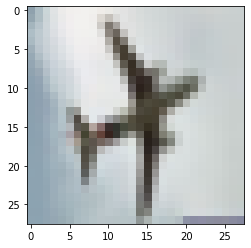

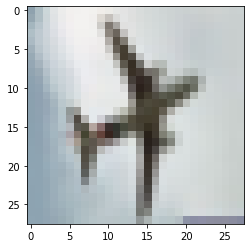

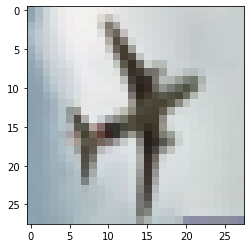

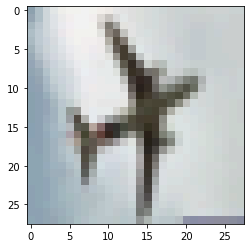

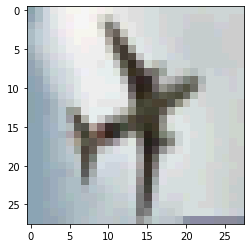

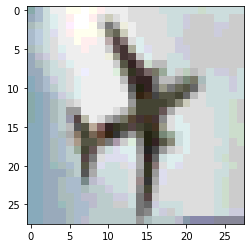

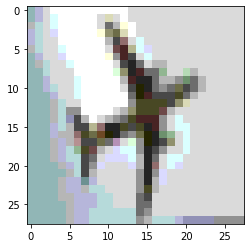

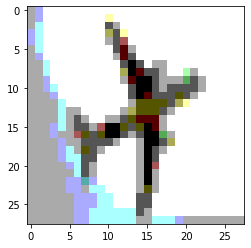

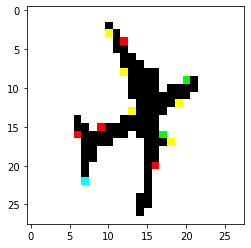

In [10]:
x_d,e_d=extract_dataloader_images(0)
f_d=torch.clone(x_d)
p_d=torch.clone(x_d)
print("Min: {}".format(min(np.ravel(x_d))))
print("Max: {}".format(max(np.ravel(x_d))))
print(abs(min(np.ravel(x_d))-max(np.ravel(x_d))))
#img = np.transpose(img, axes=[1, 2, 0])  # Put the 0-th dimension at the end
    
    # Image are supposed to be unsigned 8-bit integers. If we keep the raw images, then
    # this line is not needed. However, if we normalize or whiten the image, then the values become
    # floats. So we need to convert them back to uint8s.
plt.imshow(np.transpose(x_d[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=8)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=7)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=6)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=5)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=4)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=3)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=2)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=1)[31], axes=[1, 2, 0]))
plt.show()


In [5]:
x_d,e_d=extract_dataloader_images(0)
f_d=torch.clone(x_d)
p_d=torch.clone(x_d)
print("Min: {}".format(min(np.ravel(x_d))))
print("Max: {}".format(max(np.ravel(x_d))))
print(abs(min(np.ravel(x_d))-max(np.ravel(x_d))))
#img = np.transpose(img, axes=[1, 2, 0])  # Put the 0-th dimension at the end
    
    # Image are supposed to be unsigned 8-bit integers. If we keep the raw images, then
    # this line is not needed. However, if we normalize or whiten the image, then the values become
    # floats. So we need to convert them back to uint8s.
plt.imshow(np.transpose(x_d[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=8)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=7)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=6)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=5)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=4)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=3)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=2)[31], axes=[1, 2, 0]))
plt.show()
plt.imshow(np.transpose(bit_reduction(x_d,bit=1)[31], axes=[1, 2, 0]))
plt.show()


NameError: name 'extract_dataloader_images' is not defined

In [48]:
print(train_loader.dataset.train_data.size())
print(test_loader.dataset.test_data.size())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


f:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
f:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [41]:
nr_train = np.array([])
for i, (data, target) in enumerate(train_loader):
    nr_train=np.append(nr_train, target.cpu().detach().numpy())

nr_test = np.array([])
for i, (data, target) in enumerate(test_loader):
    nr_test=np.append(nr_test, target.cpu().detach().numpy())

In [14]:
Counter(np.sort(nr_train))

Counter({0.0: 6902,
         1.0: 7875,
         2.0: 6988,
         3.0: 7140,
         4.0: 6822,
         5.0: 6311,
         6.0: 6874,
         7.0: 7292,
         8.0: 6824,
         9.0: 6956})

In [11]:
Counter(np.sort(nr_test))

Counter({0.0: 979,
         1.0: 1133,
         2.0: 1030,
         3.0: 1009,
         4.0: 980,
         5.0: 890,
         6.0: 956,
         7.0: 1027,
         8.0: 973,
         9.0: 1007})

In [4]:
def extract_dataloader_images(epoch):
  #for batch_idx, (data, target) in enumerate(train_loader):
  examples = enumerate(test_loader,start=0)
  _, (example_data, example_targets) = next(examples)
  return(example_data, example_targets)

def count_perturbated_pixel(img1,img2):
  sum_px = 28*28
  sum_px_perturbed = 0
  for px_img1,px_img2 in zip(img1[0][0],img2[0][0]): #Zip Array of Pixels
    for px_im1,px_im2 in zip(px_img1,px_img2): #Zip Pixels
        if (px_im1 != px_im2):
            sum_px_perturbed+=1
  return((sum_px_perturbed/sum_px),sum_px,sum_px_perturbed)

def perturbate_image(img_data,mode='random',value=100):
  if (mode=='random'):
      for i in range(value):
          img_data[0][0][random.randrange(1,28),random.randrange(1,28)]=random.uniform(min(np.ravel(img_data)),max(np.ravel(img_data)))
  elif (mode=='random_white'):
      for i in range(value):
          img_data[0][0][random.randrange(1,28),random.randrange(1,28)]=round(max(np.ravel(img_data)))
  return(img_data)

def median_smoothing(img_data,kernel_size=2):
  from scipy import ndimage
  img_data_median = torch.clone(img_data)
  if  "CIFAR" in str(test_loader.dataset):
    for i in range(img_data_median.shape[0]):
      for j in range(img_data_median.shape[1]): #RGB Values
        img_data_median[i][j] = torch.from_numpy(ndimage.median_filter(img_data_median[i][j], size=kernel_size))
  else:  
    #print(img_data_median.shape.__len__())
    if (img_data_median.shape.__len__() > 2):
      for i in range(img_data_median.shape[0]):
        img_data_median[i][0] = torch.from_numpy(ndimage.median_filter(img_data_median[i][0], size=kernel_size))
    else:
      img_data_median = torch.from_numpy(ndimage.median_filter(img_data_median, size=kernel_size))
  return(img_data_median)

def bit_reduction(img_data,clip_min=0.499999,clip_max=0.5,bit=4):

  img_data_bit = torch.clone(img_data)
 
  img_min = min(np.ravel(img_data_bit))
  img_max = max(np.ravel(img_data_bit))

  if  "CIFAR" in str(test_loader.dataset):
    step_size = abs(img_min-img_max)/(pow(2,bit)-1)
    steps = pow(2,bit)
    #print("Steps: ",steps)
    #print("Step size: ",step_size)
    #print("Distance: ",abs(img_min-img_max))
    #print("Min: ",img_min)
    #print("Max: ",img_max)
    #steps = 4
    reduced_data = (img_data_bit-min(np.ravel(img_data_bit))) / (max(np.ravel(img_data_bit)) - min(np.ravel(img_data_bit)))
    step_size_norm = abs(min(np.ravel(reduced_data))-max(np.ravel(reduced_data)))/pow(2,bit)
    #print("Step size norm: ",step_size_norm)
    for i in range(img_data_bit.shape[0]):
      for j in range(img_data_bit.shape[1]): #RGB Values
        for k in range(steps):
          #print("Greater than: ",step_size_norm*k)
          #print("Lesser than: ",step_size_norm*(k+1))
          #print("K: ",k)
          reduced_data[i][j][(reduced_data[i][j]>=(step_size_norm*(k))) & (reduced_data[i][j]<=step_size_norm*(k+1))] = img_min+(k*step_size)
          #reduced_data[i][j][reduced_data[i][j]<step_size] = torch.from_numpy(np.array(img_min))
          #reduced_data[i][j][(reduced_data[i][j]>=step_size) & (reduced_data[i][j]<step_size*2)] = torch.from_numpy(np.array(img_min+step_size))
          #reduced_data[i][j][(reduced_data[i][j]>=step_size*2) & (reduced_data[i][j]<step_size*3)] = torch.from_numpy(np.array(img_min+step_size*2))
          #reduced_data[i][j][reduced_data[i][j]>=step_size*3] = torch.from_numpy(np.array(img_max))
          #print("Setted Value: ",img_min+(k*step_size))
          #print("XXXXX")
       # reduced_data[i][j][reduced_data[i][j]<ranges] = torch.from_numpy(np.array(img_min))
       # reduced_data[i][j][(reduced_data[i][j]>=ranges) & (reduced_data[i][j]<ranges*2)] = torch.from_numpy(np.array(img_min+ranges))
       # reduced_data[i][j][(reduced_data[i][j]>=ranges*2) & (reduced_data[i][j]<ranges*3)] = torch.from_numpy(np.array(img_min+ranges*2))
       # reduced_data[i][j][reduced_data[i][j]>=ranges*3] = torch.from_numpy(np.array(img_max))
  else:
    reduced_data = (img_data_bit-min(np.ravel(img_data_bit))) / (max(np.ravel(img_data_bit)) - min(np.ravel(img_data_bit)))
    reduced_data = reduced_data.clip(min=clip_min,max=clip_max)

    if (img_data_bit.shape.__len__() > 2):
      for i in range(img_data_bit.shape[0]):
        reduced_data[i][0][reduced_data[i][0]<clip_max] = torch.from_numpy(np.array(img_min))
        reduced_data[i][0][reduced_data[i][0]==clip_max] = torch.from_numpy(np.array(img_max))
    else:
      reduced_data[0][reduced_data[0]<clip_max] = torch.from_numpy(np.array(img_min))
      reduced_data[0][reduced_data[0]==clip_max] = torch.from_numpy(np.array(img_max))

  #reduced_data[reduced_data[0]==1]=img_max
  #reduced_data[reduced_data[0]==0]=img_min
  return(reduced_data)



def test_fake(data,use_network):
  use_network.eval()
  #network.eval()
  with torch.no_grad():
      output = use_network(data)
      return output

In [5]:
class ensemble_rectification(nn.Module): # This is the same as the previous one, but with a different (and more easy to understand) architecture. It has a few more neurons in each layer, replaced x.view(-1, 320) with linear layer. Replaced functional dropout with nn.dropout.
	def __init__(self, numChannels, classes):
		super(ensemble_rectification, self).__init__()

		#Net1
		self.conv1_1 = nn.Conv2d(in_channels=numChannels, out_channels=20,
			kernel_size=(5, 5))
		self.relu1_1 = nn.ReLU()
		self.maxpool1_1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

		self.conv2_1 = nn.Conv2d(in_channels=20, out_channels=50,
			kernel_size=(5, 5))
		self.relu2_1 = nn.ReLU()
		self.maxpool2_1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

		self.conv2_drop_1 = nn.Dropout2d()

		self.fc1_1 = nn.Linear(in_features=800, out_features=500)
		self.relu3_1 = nn.ReLU()
		self.dropout_l_1 = nn.Dropout(p=0.5)
		self.fc2_1 = nn.Linear(in_features=500, out_features=classes)

		#Net2
		self.conv1_2 = nn.Conv2d(in_channels=numChannels, out_channels=30,
			kernel_size=(5, 5))
		self.relu1_2 = nn.ReLU()
		self.maxpool1_2 = nn.MaxPool2d(kernel_size=(2), stride=(2, 2))

		self.conv2_2 = nn.Conv2d(in_channels=30, out_channels=75,
			kernel_size=(5, 5))
		self.relu2_2 = nn.ReLU()
		self.maxpool2_2 = nn.MaxPool2d(kernel_size=(2), stride=(2, 2))

		self.conv2_drop_2 = nn.Dropout2d()

		self.fc1_2 = nn.Linear(in_features=1200, out_features=900)
		self.relu3_2 = nn.ReLU()
		self.dropout_l_2 = nn.Dropout(p=0.3)
		self.fc2_2 = nn.Linear(in_features=900, out_features=classes)

		#Net3
		self.conv1_3 = nn.Conv2d(in_channels=numChannels, out_channels=50,
			kernel_size=(5, 5))
		self.relu1_3 = nn.ReLU()
		self.maxpool1_3 = nn.MaxPool2d(kernel_size=(2), stride=(2))

		self.conv2_3 = nn.Conv2d(in_channels=50, out_channels=125,
			kernel_size=(5, 5))
		self.relu2_3 = nn.ReLU()
		self.maxpool2_3 = nn.MaxPool2d(kernel_size=(2), stride=(2))

		self.conv2_drop_3 = nn.Dropout2d()

		self.fc1_3 = nn.Linear(in_features=2000, out_features=1000)
		self.relu3_3 = nn.ReLU()
		self.dropout_l_3 = nn.Dropout(p=0.2)
		self.fc2_3 = nn.Linear(in_features=1000, out_features=classes)
			
	def forward(self, orig):
		x = self.conv1_1(orig)
		x = self.relu1_1(x)
		x = self.maxpool1_1(x)
		x = self.conv2_1(x)
		x = self.relu2_1(x)
		x = self.maxpool2_1(x)
		x = self.conv2_drop_1(x)
		x = torch.flatten(x, 1)
		x = self.fc1_1(x)
		x = self.relu3_1(x)
		x = self.dropout_l_1(x)
		x = self.fc2_1(x)

		y = self.conv1_2(orig)
		y = self.relu1_2(y)
		y = self.maxpool1_2(y)
		y = self.conv2_2(y)
		y = self.relu2_2(y)
		y = self.maxpool2_2(y)
		y = self.conv2_drop_2(y)
		y = torch.flatten(y, 1)
		y = self.fc1_2(y)
		y = self.relu3_2(y)
		y = self.dropout_l_2(y)
		y = self.fc2_2(y)

		z = self.conv1_3(orig)
		z = self.relu1_3(z)
		z = self.maxpool1_3(z)
		z = self.conv2_3(z)
		z = self.relu2_3(z)
		z = self.maxpool2_3(z)
		z = self.conv2_drop_3(z)
		z = torch.flatten(z, 1)
		z = self.fc1_3(z)
		z = self.relu3_3(z)
		z = self.dropout_l_3(z)
		z = self.fc2_3(z)

		concat = torch.cat([x, y, z], dim=1)

		return concat

In [21]:
class simple_net(nn.Module):
    def __init__(self):
        super(simple_net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [22]:
class simple_net_upgraded(nn.Module): # This is the same as the previous one, but with a different (and more easy to understand) architecture. It has a few more neurons in each layer, replaced x.view(-1, 320) with linear layer. Replaced functional dropout with nn.dropout.
	def __init__(self, numChannels, classes):
		super(simple_net_upgraded, self).__init__()

		self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=20,
			kernel_size=(5, 5))
		self.relu1 = nn.ReLU()
		self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

		self.conv2 = nn.Conv2d(in_channels=20, out_channels=50,
			kernel_size=(5, 5))
		self.relu2 = nn.ReLU()
		self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

		self.conv2_drop = nn.Dropout2d()

		self.fc1 = nn.Linear(in_features=800, out_features=500)
		self.relu3 = nn.ReLU()
		self.dropout_l = nn.Dropout(p=0.5)
		self.fc2 = nn.Linear(in_features=500, out_features=classes)

	def forward(self, x):

		x = self.conv1(x)
		x = self.relu1(x)
		x = self.maxpool1(x)

		x = self.conv2(x)
		x = self.relu2(x)
		x = self.maxpool2(x)
		x = self.conv2_drop(x)
		x = torch.flatten(x, 1)
		x = self.fc1(x)
		x = self.relu3(x)
		x = self.dropout_l(x)
		x = self.fc2(x)
		return x

In [23]:
class simple_net_upgraded2(nn.Module): 											# This is the same as the previous one, but with a different (and more easy to understand) architecture. It has a few more neurons in each layer, replaced x.view(-1, 320) with linear layer. Replaced functional dropout with nn.dropout.
	def __init__(self, numChannels, classes):
		super(simple_net_upgraded2, self).__init__()

		self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=30,
			kernel_size=(5, 5))
		self.relu1 = nn.ReLU()
		self.maxpool1 = nn.MaxPool2d(kernel_size=(2), stride=(2, 2))

		self.conv2 = nn.Conv2d(in_channels=30, out_channels=75,
			kernel_size=(5, 5))
		self.relu2 = nn.ReLU()
		self.maxpool2 = nn.MaxPool2d(kernel_size=(2), stride=(2, 2))

		self.conv2_drop = nn.Dropout2d()

		self.fc1 = nn.Linear(in_features=1200, out_features=900)
		self.relu3 = nn.ReLU()
		self.dropout_l = nn.Dropout(p=0.3)
		self.fc2 = nn.Linear(in_features=900, out_features=classes)

	def forward(self, x):

		x = self.conv1(x)
		x = self.relu1(x)
		x = self.maxpool1(x)

		x = self.conv2(x)
		x = self.relu2(x)
		x = self.maxpool2(x)
		x = self.conv2_drop(x)
		x = torch.flatten(x, 1)
		x = self.fc1(x)
		x = self.relu3(x)
		x = self.dropout_l(x)
		x = self.fc2(x)
		return x

In [24]:
class simple_net_upgraded3(nn.Module): # This is the same as the previous one, but with a different (and more easy to understand) architecture. It has a few more neurons in each layer, replaced x.view(-1, 320) with linear layer. Replaced functional dropout with nn.dropout.
	def __init__(self, numChannels, classes):
		super(simple_net_upgraded3, self).__init__()

		self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=50,
			kernel_size=(5, 5))
		self.relu1 = nn.ReLU()
		self.maxpool1 = nn.MaxPool2d(kernel_size=(2), stride=(2))

		self.conv2 = nn.Conv2d(in_channels=50, out_channels=125,
			kernel_size=(5, 5))
		self.relu2 = nn.ReLU()
		self.maxpool2 = nn.MaxPool2d(kernel_size=(2), stride=(2))

		self.conv2_drop = nn.Dropout2d()

		self.fc1 = nn.Linear(in_features=2000, out_features=1000)
		self.relu3 = nn.ReLU()
		self.dropout_l = nn.Dropout(p=0.2)
		self.fc2 = nn.Linear(in_features=1000, out_features=classes)

	def forward(self, x):

		x = self.conv1(x)
		x = self.relu1(x)
		x = self.maxpool1(x)

		x = self.conv2(x)
		x = self.relu2(x)
		x = self.maxpool2(x)
		x = self.conv2_drop(x)
		x = torch.flatten(x, 1)
		x = self.fc1(x)
		x = self.relu3(x)
		x = self.dropout_l(x)
		x = self.fc2(x)
		return x

In [22]:
log_interval = 187 #60000/batch_size_train = 1875 => 10 Datapoints per Epoch => 187 Logs per Epoch
n_epochs = 10
learning_rate = 0.007 #0.007
momentum = 0.5
load_data = 1
load_adv = 1
###########
use_upgraded_net = 1
use_ensemble = 1
use_integrated_ensemble = 1
##########
save_net = 0
##########

if (use_upgraded_net == 1):  
    if (use_ensemble == 1):
        if (use_integrated_ensemble==1):
            if  "CIFAR" in str(test_loader.dataset):
                network = ensemble_rectification(3,10)
                network.apply(reset_weights)
            elif "MNIST" in str(test_loader.dataset):
                network = ensemble_rectification(1,10)
                network.apply(reset_weights)
            print("Using integrated Ensemble")
        else:
            network = simple_net_upgraded(1,10)
            network2 = simple_net_upgraded2(1,10)
            network3 = simple_net_upgraded3(1,10)
            network.apply(reset_weights)
            network2.apply(reset_weights)
            network3.apply(reset_weights)
            print("Using Ensemble")
        
    
    else:
        network = simple_net_upgraded(1,10)
        network.apply(reset_weights)
        print ("Using Upgraded Net")
else:
    network = simple_net()
    network.apply(reset_weights)
    print ("Using Basic Net")


#device = "cuda:0"
#network.to(device)
if (use_ensemble == 0):
    optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
if (use_ensemble == 1 and use_integrated_ensemble == 0):
    optimizer_ensemble = optim.SGD(list(network.parameters())+list(network2.parameters())+list(network3.parameters()), lr=learning_rate, momentum=momentum)
    print("Loaded Optimizer for Ensemble")
if (use_ensemble and use_integrated_ensemble):
    optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

if (load_data and use_upgraded_net == 0):
    network.load_state_dict(torch.load('../src/results/model.pth'))
    print('Loaded model from file')
    optimizer.load_state_dict(torch.load('../src/results/optimizer.pth'))
    print('Loaded optimizer from basic model')
if (load_data and use_upgraded_net == 1):
    if (use_ensemble==1 and use_integrated_ensemble==0):
        network.load_state_dict(torch.load('../src/results/model_upgraded_ens.pth'))
        network2.load_state_dict(torch.load('../src/results/model2_upgraded_ens.pth'))
        network3.load_state_dict(torch.load('../src/results/model3_upgraded_ens.pth'))
        print('Loaded upgraded ensemble model from file')
        optimizer_ensemble.load_state_dict(torch.load('../src/results/optimizer_ensemble.pth'))
        print('Loaded ensemble optimizer from upgraded model')
    if (use_ensemble and use_integrated_ensemble):

        if  "CIFAR" in str(test_loader.dataset):
            if (load_adv):
                network.load_state_dict(torch.load('../src/results/model_integrated_ens_adv_cifar.pth'))
                print('Loaded integrated adversarial trained ensemble model for cifar from file')
                optimizer.load_state_dict(torch.load('../src/results/optimizer_integrated_adv_cifar.pth'))
                print('Loaded adversarial trained optimizer from integrated ensemble model for cifar')
            else:
                network.load_state_dict(torch.load('../src/results/model_integrated_ens_cifar.pth'))
                print('Loaded integrated ensemble model for cifar from file')
                optimizer.load_state_dict(torch.load('../src/results/optimizer_integrated_cifar.pth'))
                print('Loaded optimizer from integrated ensemble model for cifar')
        else:
            if (load_adv):
                network.load_state_dict(torch.load('../src/results/model_integrated_ens_adv.pth')) #../src/results/model_integrated_ens_adv_mnist_03.pth
                print('Loaded integrated mnist ensemble model from file')
                optimizer.load_state_dict(torch.load('../src/results/optimizer_integrated_adv.pth')) # ../src/results/optimizer_integrated_adv_mnist_03.pth
                print('Loaded optimizer mnist from integrated ensemble model')
            else:
                network.load_state_dict(torch.load('../src/results/model_integrated_ens.pth'))
                print('Loaded integrated ensemble model from file')
                optimizer.load_state_dict(torch.load('../src/results/optimizer_integrated.pth'))
                print('Loaded optimizer from integrated ensemble model')

    if (use_ensemble==0 and use_integrated_ensemble==0):
        network.load_state_dict(torch.load('../src/results/model_upgraded_ens.pth'))
        print('Loaded upgraded model from file')
        optimizer.load_state_dict(torch.load('../src/results/optimizer_upgraded.pth'))
        print('Loaded optimizer from upgraded model')

if (save_net==1):
    print('WARNING: Saving model to file!! Will overwrite existing file!!!')

Reset trainable parameters of layer = Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=800, out_features=500, bias=True)
Reset trainable parameters of layer = Linear(in_features=500, out_features=10, bias=True)
Reset trainable parameters of layer = Conv2d(3, 30, kernel_size=(5, 5), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(30, 75, kernel_size=(5, 5), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=1200, out_features=900, bias=True)
Reset trainable parameters of layer = Linear(in_features=900, out_features=10, bias=True)
Reset trainable parameters of layer = Conv2d(3, 50, kernel_size=(5, 5), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(50, 125, kernel_size=(5, 5), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=2000, out_features=1000, bias=True)
Reset trainable pa

In [7]:
def train(epoch,use_ensemble=0,adversial_train=0,dataset="MNIST"):
  network.train()
  #fmodel = fb.PyTorchModel(network, bounds=(-0.4242129623889923, 2.821486711502075), device="cpu")
  attack = fb.attacks.PGD()
  if (use_ensemble==1 and use_integrated_ensemble==0):
    network2.train()
    network3.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    if (use_ensemble == 1 and use_integrated_ensemble == 0):
      optimizer_ensemble.zero_grad()
      output1 = network(data)
      output2 = network2(data)
      output3 = network3(data)
      output = (output1 + output2 + output3)/3 # Average of three networks...not used here but it is usefull in test. You could also use the aggregated output as for the loss but that can result in false weight balancings when a specific model has made a false prediction. Need more literature checking!
      #loss = F.cross_entropy(output, target)
      #loss.backward()
      loss1 = F.cross_entropy(output1, target)
      loss2 = F.cross_entropy(output2, target)
      loss3 = F.cross_entropy(output3, target)
      loss = (loss1 + loss2 + loss3)
      loss.backward()
      optimizer_ensemble.step()
    else:
      optimizer.zero_grad()
      if (adversial_train):
        if (dataset=="CIFAR"):
          if (epoch%2==0):
            epsilons = [0.3] #, 0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0
            network.eval()
            fmodel = fb.PyTorchModel(network, bounds=(-1.989473819732666, 2.130864143371582), device="cpu")
            attack = fb.attacks.PGD()
            raw_advs, advs, is_adv = attack(fmodel, data, target, epsilons=epsilons)
            data = advs[0]
            network.train()
            optimizer.zero_grad()
          else:
            epsilons = [0.3] #, 0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0
            network.eval()
            fmodel = fb.PyTorchModel(network, bounds=(-1.989473819732666, 2.130864143371582), device="cpu")
            attack = fb.attacks.FGSM()
            raw_advs, advs, is_adv = attack(fmodel, data, target, epsilons=epsilons)
            data = advs[0]
            network.train()
            optimizer.zero_grad()
        else:
          if (epoch%2==0):
            epsilons = [0.3] #, 0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0
            network.eval()
            fmodel = fb.PyTorchModel(network, bounds=(-0.4242129623889923, 2.821486711502075), device="cpu")
            attack = fb.attacks.PGD()
            raw_advs, advs, is_adv = attack(fmodel, data, target, epsilons=epsilons)
            data = advs[0]
            network.train()
            optimizer.zero_grad()
          else:
            epsilons = [0.3] #, 0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0
            network.eval()
            fmodel = fb.PyTorchModel(network, bounds=(-0.4242129623889923, 2.821486711502075), device="cpu")
            attack = fb.attacks.FGSM()
            raw_advs, advs, is_adv = attack(fmodel, data, target, epsilons=epsilons)
            data = advs[0]
            network.train()
            optimizer.zero_grad()
          ########!
          
      ########!
      output = network(data)
      loss = F.cross_entropy(output, target)
      loss.backward()
      optimizer.step()
    
    
    
    if (batch_idx % log_interval == 0) and (batch_idx != 0):
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      if (use_ensemble==1 and use_integrated_ensemble ==0):  
        print('Loss 1: {:.6f}'.format(loss1.item()))
        print('Loss 2: {:.6f}'.format(loss2.item()))
        print('Loss 3: {:.6f}'.format(loss3.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*batch_size_train) + ((epoch-1)*len(train_loader.dataset)))
#https://discuss.pytorch.org/t/optimizing-based-on-another-models-output/6935/14
#https://discuss.pytorch.org/t/using-a-combined-loss-to-update-two-different-models/73925
      

# Train difference value for adversial detection

In [71]:
def evaluate_threshold(network,train_loader,start,end,step):
  epsilons = []
  pertubation_ratio = []
  network.eval()
  with torch.no_grad():
    baseline_acc = test()
    while(start <= end):
      pertubated=0
      not_pertubated=0
      for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
      
        output = network(data)

        # Output median smoothed ensemble
        median_smoothed_batch=torch.clone(data)
        median_smoothed_batch = median_smoothing(median_smoothed_batch)
        output_ms = network(median_smoothed_batch)
        # Output bit reduced ensemble
        bit_reduced_batch=torch.clone(data)
        bit_reduced_batch = bit_reduction(bit_reduced_batch)
        output_br = network(bit_reduced_batch)
      
        pred = output.data.max(1, keepdim=True)[1]
        pred_ms = output_ms.data.max(1, keepdim=True)[1]
        pred_br = output_br.data.max(1, keepdim=True)[1]

        tensor_map_pred= F.softmax(output, dim=1)
        tensor_map_ms = F.softmax(output_ms, dim=1)
        tensor_map_br = F.softmax(output_br, dim=1)
      
        for x in range(len(pred)):
          difference_ms=(tensor_map_pred[x])-(tensor_map_ms[x])
          difference_br=(tensor_map_pred[x])-(tensor_map_br[x])
          distance_list=[max(difference_br).item(),max(difference_ms).item()]
          #difference_total = statistics.fmean(distance_list)
          difference_total = max(distance_list)
          #print("Max Tensor Distance:", difference_total)
          if (difference_total > start):
            pertubated+=1
            #print("Image is pertubated")
          else:
            not_pertubated+=1
            #print("Image is not pertubated")
      ratio=(100/len(train_loader.dataset))*not_pertubated
      epsilons.append(start)
      pertubation_ratio.append(ratio)
      print("Threshold {} with accuracy {}%".format(start,ratio))
      print("Threshold Accuracy/Baseline Accuracy diff: ",abs(baseline_acc.item()-ratio))
      print("Pertubated: {}".format(pertubated))
      print("Not Pertubated: {}".format(not_pertubated))
      print("#############################################")
      start+=step
  return(np.array(epsilons),np.array(pertubation_ratio),np.array(pertubated),np.array(not_pertubated))
  
      

In [72]:
ep, pert_ratio, pt, n_pt = evaluate_threshold(network,train_loader,start=0.005,end=0.050,step=0.005)


Test set: Avg. loss: 0.0007, Accuracy: 9920/10000 (99%)

Threshold 0.005 with accuracy 90.11%
Threshold Accuracy/Baseline Accuracy diff:  9.089996948242188
Pertubated: 5934
Not Pertubated: 54066
#############################################
Threshold 0.01 with accuracy 92.42%
Threshold Accuracy/Baseline Accuracy diff:  6.779996948242186
Pertubated: 4548
Not Pertubated: 55452
#############################################
Threshold 0.015 with accuracy 93.43833333333333%
Threshold Accuracy/Baseline Accuracy diff:  5.761663614908855
Pertubated: 3937
Not Pertubated: 56063
#############################################
Threshold 0.02 with accuracy 94.14666666666668%
Threshold Accuracy/Baseline Accuracy diff:  5.053330281575512
Pertubated: 3512
Not Pertubated: 56488
#############################################
Threshold 0.025 with accuracy 94.64%
Threshold Accuracy/Baseline Accuracy diff:  4.559996948242187
Pertubated: 3216
Not Pertubated: 56784
#############################################


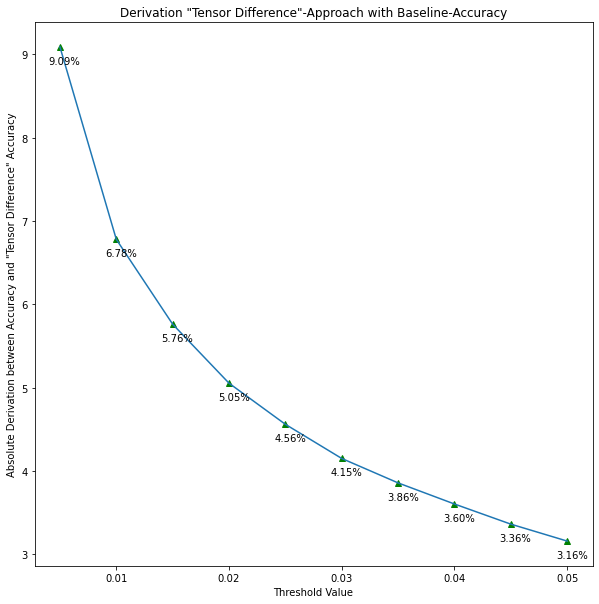

In [166]:

plt.figure(figsize=(10,10))
plt.xlabel('Threshold Value')
plt.ylabel('Absolute Derivation between Accuracy and "Tensor Difference" Accuracy')
plt.title('Derivation "Tensor Difference"-Predictions with Baseline-Accuracy')

for i in range(len(pert_ratio)):
    plt.annotate("{:.2f}%".format(99.20-pert_ratio[i]), (ep[i]-0.001,99.20-pert_ratio[i]-0.2))
plt.plot(ep, 99.20-pert_ratio, 'g^',ep,99.20-pert_ratio)

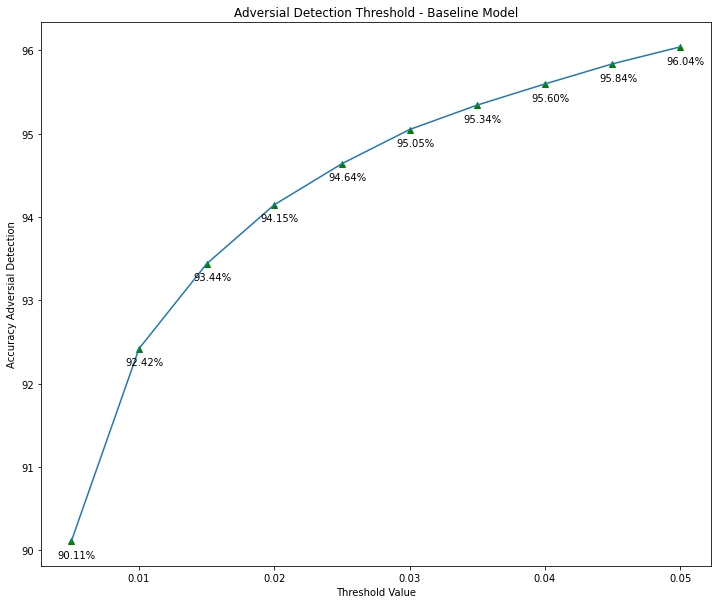

In [114]:

plt.figure(figsize=(12,10))
plt.xlabel('Threshold Value')
plt.ylabel('Accuracy Adversial Detection')
plt.title('Adversial Detection Threshold - Baseline Model')

for i in range(len(pert_ratio)):
    plt.annotate("{:.2f}%".format(pert_ratio[i]), (ep[i]-0.001,pert_ratio[i]-0.2))
plt.plot(ep, pert_ratio, 'g^',ep,pert_ratio)

In [12]:
#! Warning: Function is really slow because it generates new pertubations for each step

start=0.4
end=0.5
step=0.01
pert_count=0
epsilons = []
pertubation_ratio = []
accuracies_adversial = []
from foolbox.criteria import Misclassification
# load data from dataloader
while(start <= end):
  pertubated=0
  not_pertubated=0
  pert_count=0
  for i, data in enumerate(train_loader,0):
    input, label = data
    input, label = Variable(input.to(device)), Variable(label.to(device))

    model = network.eval()

      
      # Generate adversial dataset for attack
    fmodel = fb.PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075), device="cpu")
    attack = fb.attacks.FGSM()
    epsilons = [0.3] #, 0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0
    criterion = Misclassification(label)
    raw_advs, advs, is_adv = attack(fmodel, input, label, epsilons=epsilons)
    output = network(raw_advs[0])

        # Output median smoothed ensemble
    median_smoothed_batch=torch.clone(raw_advs[0])
    median_smoothed_batch = median_smoothing(median_smoothed_batch)
    output_ms = network(median_smoothed_batch)
        # Output bit reduced ensemble
    bit_reduced_batch=torch.clone(raw_advs[0])
    bit_reduced_batch = bit_reduction(bit_reduced_batch)
    output_br = network(bit_reduced_batch)
      
    pred = output.data.max(1, keepdim=True)[1]
    pred_ms = output_ms.data.max(1, keepdim=True)[1]
    pred_br = output_br.data.max(1, keepdim=True)[1]

    tensor_map_pred= F.softmax(output, dim=1)
    tensor_map_ms = F.softmax(output_ms, dim=1)
    tensor_map_br = F.softmax(output_br, dim=1)
      
    for x in range(len(pred)):
      difference_ms=abs((tensor_map_pred[x])-(tensor_map_ms[x]))
      difference_br=abs((tensor_map_pred[x])-(tensor_map_br[x]))
      distance_list=[max(difference_br).item(),max(difference_ms).item()]
          #difference_total = statistics.fmean(distance_list)
      difference_total = max(distance_list)
          #print("Max Tensor Distance:", difference_total)
      if (difference_total > start):
        pertubated+=1
            #print("Image is pertubated")
      else:
        not_pertubated+=1
            #print("Image is not pertubated")
    pert_count+=np.count_nonzero(is_adv.cpu().view(-1).numpy())
    accuracies_adversial.append(fb.utils.accuracy(fmodel, raw_advs[0], label))
  ratio=(100/pert_count)*pertubated
  epsilons.append(start)
  pertubation_ratio.append(ratio)
  
  print("Threshold {} with derivation of {}%".format(start,100-ratio))
  print("Accuracy attacked Baseline: ",np.array(accuracies_adversial).mean())
  print("Pertubated real: {}".format(pert_count))
  print("Pertubated calculated: {}".format(pertubated))
  print("Not Pertubated calculated: {}".format(not_pertubated))
  print("#############################################")
  start+=step

Threshold 0.4 with derivation of -10.366574694521091%
Accuracy attacked Baseline:  0.9154333333333333
Pertubated real: 5074
Pertubated calculated: 5600
Not Pertubated calculated: 54400
#############################################
Threshold 0.41000000000000003 with derivation of -7.50886874260938%
Accuracy attacked Baseline:  0.9154333333333333
Pertubated real: 5074
Pertubated calculated: 5455
Not Pertubated calculated: 54545
#############################################
Threshold 0.42000000000000004 with derivation of -4.197871501773747%
Accuracy attacked Baseline:  0.9154333333333333
Pertubated real: 5074
Pertubated calculated: 5287
Not Pertubated calculated: 54713
#############################################
Threshold 0.43000000000000005 with derivation of -1.1824990145841525%
Accuracy attacked Baseline:  0.9154333333333333
Pertubated real: 5074
Pertubated calculated: 5134
Not Pertubated calculated: 54866
#############################################
Threshold 0.44000000000000006 w

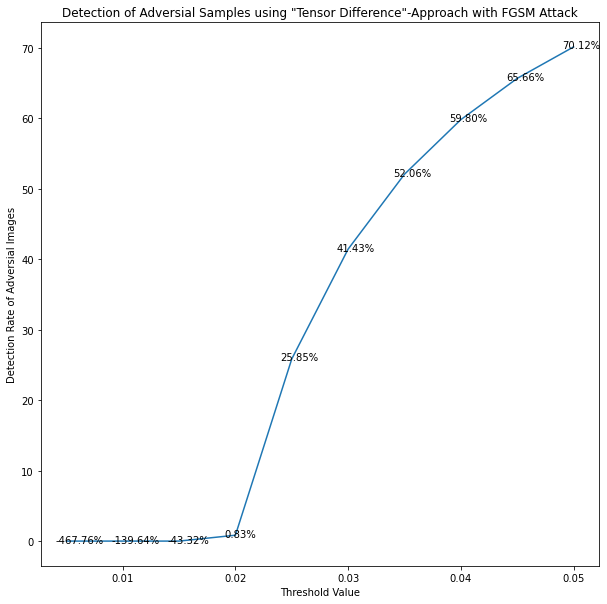

In [167]:
plt.figure(figsize=(10,10))
plt.xlabel('Threshold Value')
plt.ylabel('Detection Rate of Adversial Images')
plt.title('Detection of Adversial Samples using "Tensor Difference"-Approach with FGSM Attack')

for i in range(len(pertubation_ratio)):
    plt.annotate("{:.2f}%".format(100-pertubation_ratio[i]), (ep[i]-0.001,(100-np.array(pertubation_ratio[i])).clip(min=0)-0.2))
plt.plot(ep, (100-np.array(pertubation_ratio)).clip(min=0))

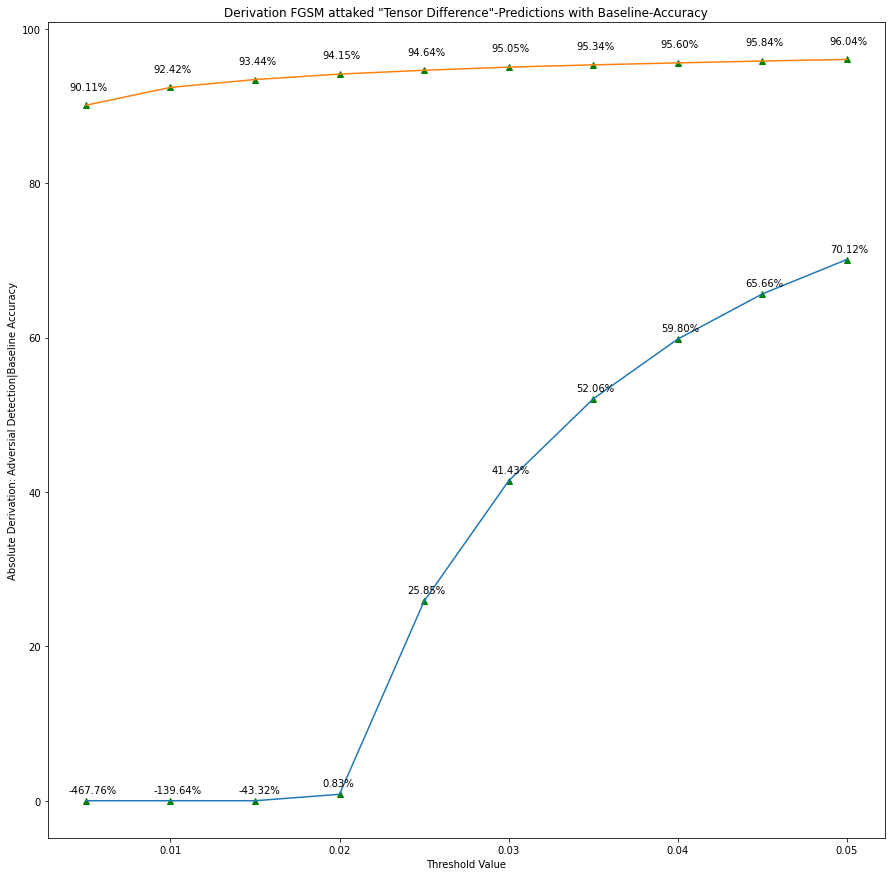

In [180]:
plt.figure(figsize=(15,15))
plt.xlabel('Threshold Value')
plt.ylabel('Absolute Derivation: Adversial Detection|Baseline Accuracy')
plt.title('Derivation FGSM attaked "Tensor Difference"-Predictions with Baseline-Accuracy')

for i in range(len(pertubation_ratio)):
    plt.annotate("{:.2f}%".format(100-pertubation_ratio[i]), (ep[i]-0.001,(100-np.array(pertubation_ratio[i])).clip(min=0)+1))
plt.plot(ep, (100-np.array(pertubation_ratio)).clip(min=0),'g^',ep, (100-np.array(pertubation_ratio)).clip(min=0))

for i in range(len(pert_ratio)):
    plt.annotate("{:.2f}%".format(pert_ratio[i]), (ep[i]-0.001,pert_ratio[i]+2))
plt.plot(ep, pert_ratio, 'g^',ep,pert_ratio)


In [8]:
def test(use_ensemble=0):
  test_losses=[]
  test_acc = []
  network.eval()
  if (use_ensemble==1 and use_integrated_ensemble==0):
    network2.eval()
    network3.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      if (use_ensemble==1 and use_integrated_ensemble==0):
        output2 = network2(data)
        output3 = network3(data)
        output = (output + output2 + output3)/3# Average of three networks. Alternative is to use majority voting using output.data.max(1)[1] for each output and write it to an array to get argmax

      test_loss += F.cross_entropy(output, target).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  acc = 100. * correct / len(test_loader.dataset)
  test_acc.append(acc)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  return(acc)

In [9]:
test()


Test set: Avg. loss: 0.0007, Accuracy: 9920/10000 (99%)



tensor(99.2000)

In [197]:
def test_conv_image_rect(use_ensemble=1):
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
    test_acc = []
    debug_output = 1
    network.eval()
    network2.eval()
    network3.eval()
    test_loss = 0
    correct = 0
    correct_ms = 0
    correct_br = 0
    correct_ensemble = 0
    pertubated = 0
    not_pertubated = 0
    with torch.no_grad():
        for data, target in test_loader:

            # Output original ensemble
            output = network(data)
            output2 = network2(data)
            output3 = network3(data)

            # Output median smoothed ensemble
            median_smoothed_batch=torch.clone(data)
            median_smoothed_batch = median_smoothing(median_smoothed_batch)
            output_ms = network(median_smoothed_batch)
            output2_ms = network2(median_smoothed_batch)
            output3_ms = network3(median_smoothed_batch)
            # Output bit reduced ensemble
            bit_reduced_batch=torch.clone(data)
            bit_reduced_batch = bit_reduction(bit_reduced_batch)
            output_br = network(bit_reduced_batch)
            output2_br = network2(bit_reduced_batch)
            output3_br = network3(bit_reduced_batch)

            # Average of three networks. Alternative is to use majority voting using output.data.max(1)[1] for each output and write it to an array to get argmax
            output = (output + output2 + output3)/3
            output_ms = (output_ms + output2_ms + output3_ms)/3
            output_br = (output_br + output2_br + output3_br)/3

            # Losses for each ensemble
            test_loss += F.cross_entropy(output, target).item()
            # To
            # Do

            # Test accuracy

            pred = output.data.max(1, keepdim=True)[1]
            pred_ms = output_ms.data.max(1, keepdim=True)[1]
            pred_br = output_br.data.max(1, keepdim=True)[1]

            tst= F.softmax(output, dim=1)
            tst_med = F.softmax(output_ms, dim=1)
            tst_scaled = F.softmax(output_br, dim=1)



            # Jury Vote for ensemble predictions
            jury_vote = []
            for x in range(len(pred)):
                votes = []
                first_vote = output.data.max(1, keepdim=True)[1][x].item()
                second_vote = output_ms.data.max(1, keepdim=True)[1][x].item()
                third_vote = output_br.data.max(1, keepdim=True)[1][x].item()
                votes.append(first_vote)
                votes.append(second_vote)
                votes.append(third_vote)
                jury_vote.append(np.bincount(votes).argmax())
                difference_ms=(tst[x])-(tst_med[x])
                difference_br=(tst[x])-(tst_scaled[x])


                distance_list=[max(difference_br).item(),max(difference_ms).item()]
                #difference_total = statistics.fmean(distance_list)
                difference_total = max(distance_list)
                #print("Max Tensor Distance:", difference_total)

                if (difference_total > 0.015):
                    pertubated+=1
                    #print("Image is pertubated")
                else:
                    not_pertubated+=1
                    #print("Image is not pertubated")
                
                if(target[x].item()==jury_vote[x]):
                    correct_ensemble += 1
                else:
                    print("Original target:",target[x].item(),"| Jury voted class:",jury_vote[x],"| Vanilla Ensemble Vote:" ,first_vote,"Median-Smoothed Ensemble Vote:",second_vote,"Bit-Reduced Ensemble Vote:",third_vote)
                    if (debug_output):
                        fig = plt.figure()
                        ax1 = fig.add_subplot(131)  # left side
                        ax2 = fig.add_subplot(132)  # right side
                        ax3 = fig.add_subplot(133)  # right side
                    
                        ax1.title.set_text("Original Image")
                        ax2.title.set_text("Median Smoothed Image")
                        ax3.title.set_text("Bit Reduced Image")

                        ax1.imshow(data[x][0], cmap='gray', interpolation='none')
                        ax2.imshow(median_smoothed_batch[x][0], cmap='gray', interpolation='none')
                        ax3.imshow(bit_reduced_batch[x][0], cmap='gray', interpolation='none')
                        fig.text(.5, .05, "Original Target: {}".format(target[x].item()), ha='center')
                        fig.set_figheight(5)
                        fig.set_figwidth(10)
                        plt.show()


            correct += pred.eq(target.data.view_as(pred)).sum()
            correct_ms += pred_ms.eq(target.data.view_as(pred_ms)).sum()
            correct_br += pred_br.eq(target.data.view_as(pred_br)).sum()
            
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    acc = 100. * correct / len(test_loader.dataset)
    test_acc.append(acc)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%), Accuracy_Median: {}, Accuracy_BitSmooth: {}, Accuracy_Ensemble: {}, perturbated_count: {}, not_perturbated_count: {}\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset), correct_ms, correct_br, correct_ensemble, pertubated, not_pertubated))
    

In [198]:
test_conv_image_rect()

NameError: name 'network2' is not defined

In [178]:
#0.001, pert=1430,n_pert=8554
#0.002, pert=1114,n_pert=8870
#0.003, pert=961,n_pert=9023
#0.004, pert=865,n_pert=9119
#0.005, pert=803,n_pert=9181
#0.006, pert=752,n_pert=9232
#0.007, pert=710,n_pert=9274
#0.008, pert=667,n_pert=9317
#0.009, pert=627,n_pert=9357
#0.010, pert=608,n_pert=9376
#0.011, pert=586,n_pert=9398
#0.012, pert=569,n_pert=9415
#0.013, pert=552,n_pert=9432
#0.014, pert=536,n_pert=9448
#0.015, pert=515,n_pert=9469
#0.020, pert=461,n_pert=9523
#0.025, pert=432,n_pert=9552
#0.030, pert=400,n_pert=9584

In [10]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
test_acc = []

test()
for epoch in range(1, n_epochs + 1):
  train(epoch,adversial_train=1,dataset="MNIST")
  test()

if (use_upgraded_net==0 and save_net==1):
  torch.save(network.state_dict(), '../src/results/model.pth')
  torch.save(optimizer.state_dict(), '../src/results/optimizer.pth')
  print("Saved Modell to file")
elif (use_upgraded_net==1 and save_net==1):
  
  if (use_ensemble == 1 and use_integrated_ensemble == 0):
      torch.save(network.state_dict(), '../src/results/model_upgraded_ens.pth')
      torch.save(network2.state_dict(), '../src/results/model2_upgraded_ens.pth')
      torch.save(network3.state_dict(), '../src/results/model3_upgraded_ens.pth')
      torch.save(optimizer_ensemble.state_dict(), '../src/results/optimizer_ensemble.pth')
  if (use_ensemble == 1 and use_integrated_ensemble == 1):
      if  "cifar" in str(test_loader.dataset.filename):
        torch.save(network.state_dict(), '../src/results/model_integrated_ens_cifar.pth')
        torch.save(optimizer.state_dict(), '../src/results/optimizer_integrated_cifar.pth')
        print("Hello")
      else:
        torch.save(network.state_dict(), '../src/results/model_integrated_ens.pth')
        torch.save(optimizer.state_dict(), '../src/results/optimizer_integrated.pth')

  if (use_ensemble==0 and use_integrated_ensemble == 0):
      torch.save(network.state_dict(), '../src/results/model_upgraded.pth')
      torch.save(optimizer.state_dict(), '../src/results/optimizer_upgraded.pth')
  print("Saved Modell to file")
save_net = 0 #Secure that only one model is saved


Test set: Avg. loss: 0.0009, Accuracy: 9892/10000 (99%)

Train Epoch: 1 [5984/60000 (10%)]	Loss: 0.285587
Train Epoch: 1 [11968/60000 (20%)]	Loss: 0.015238
Train Epoch: 1 [17952/60000 (30%)]	Loss: 0.245951
Train Epoch: 1 [23936/60000 (40%)]	Loss: 0.111439
Train Epoch: 1 [29920/60000 (50%)]	Loss: 0.256799
Train Epoch: 1 [35904/60000 (60%)]	Loss: 0.242399
Train Epoch: 1 [41888/60000 (70%)]	Loss: 0.136630
Train Epoch: 1 [47872/60000 (80%)]	Loss: 0.108147
Train Epoch: 1 [53856/60000 (90%)]	Loss: 0.072000
Train Epoch: 1 [59840/60000 (100%)]	Loss: 0.211496

Test set: Avg. loss: 0.0009, Accuracy: 9900/10000 (99%)

Train Epoch: 2 [5984/60000 (10%)]	Loss: 0.156696
Train Epoch: 2 [11968/60000 (20%)]	Loss: 0.149578
Train Epoch: 2 [17952/60000 (30%)]	Loss: 0.175112
Train Epoch: 2 [23936/60000 (40%)]	Loss: 0.085480
Train Epoch: 2 [29920/60000 (50%)]	Loss: 0.072918
Train Epoch: 2 [35904/60000 (60%)]	Loss: 0.124660
Train Epoch: 2 [41888/60000 (70%)]	Loss: 0.100030
Train Epoch: 2 [47872/60000 (80%)]	

In [ ]:
torch.save(network.state_dict(), '../src/results/model_integrated_ens_adv_mnist_03_n.pth')
torch.save(optimizer.state_dict(), '../src/results/optimizer_integrated_adv_mnist_03_n.pth')

In [34]:
torch.save(network.state_dict(), '../src/results/model_integrated_ens_adv_cifar.pth')
torch.save(optimizer.state_dict(), '../src/results/optimizer_integrated_adv_cifar.pth')

In [11]:
test()


Test set: Avg. loss: 0.0009, Accuracy: 9892/10000 (99%)



tensor(98.9200)

# Evaluate Baseline

In [7]:
def calculate_threshold_baseline (differences,misclassified=0,threshold_fp_percent=0,start=0.00001,end=1) -> float:
    max_fp = len(differences)*(threshold_fp_percent/100)
    # 500
    while (start <= end):
        fp = np.count_nonzero(differences[differences>start])
        if (fp == misclassified):
            return start,fp,(len(differences)-fp)
        start += 0.00001
    return (1)

    

In [49]:
def calculate_threshold_adversarial(differences_test,adversarial_map,correction_t=1.0,print_output=True,is_evaluate=False,t=None,is_paper=False) -> float:
    difference_map = zip(differences_test,adversarial_map)
    adversarial_distances = []
    non_adversarial_distances = []
    for x in range (len(adversarial_map)):
        if (adversarial_map[x]==1):
            adversarial_distances.append(differences_test[x])
        if (adversarial_map[x]==0):
            non_adversarial_distances.append(differences_test[x])
    
    print(max(adversarial_distances))
    print(min(adversarial_distances))
    print(np.array(adversarial_distances).mean())
    print("##########")
    print(max(non_adversarial_distances))
    print(min(non_adversarial_distances))
    print(np.array(non_adversarial_distances).mean())
    #t=(min(adversarial_distances)+max(non_adversarial_distances))/2
    t_distance=(min(adversarial_distances)+max(non_adversarial_distances))/2
    t_legitimate_mean=np.array(non_adversarial_distances).mean()
    t_adaptive=(t_distance+t_legitimate_mean)/2
    print("Distance t legitimate mean:",t_legitimate_mean)
    print("Distance t min-max:",t_distance)
    print("Distance t conservative mean:",t_adaptive)
    # Should t be more conservative or aggressive. Higher t means more conservative, resulting in less True Positives but less False Positives. True Negative Detection is rising with higher t and falling True Positive

    non_adversarial_distances=np.array(non_adversarial_distances)
    adversarial_distances=np.array(adversarial_distances)
    # Measure Quality of the three t_calc Models
    true_t_distance = np.count_nonzero(non_adversarial_distances[non_adversarial_distances<=t_distance])+np.count_nonzero(adversarial_distances[adversarial_distances>=t_distance])
    false_t_distance = np.count_nonzero(non_adversarial_distances[non_adversarial_distances>=t_distance])+np.count_nonzero(adversarial_distances[adversarial_distances<=t_distance])
    true_t_adaptive = np.count_nonzero(non_adversarial_distances[non_adversarial_distances<=t_adaptive])+np.count_nonzero(adversarial_distances[adversarial_distances>=t_adaptive])
    false_t_adaptive = np.count_nonzero(non_adversarial_distances[non_adversarial_distances>=t_adaptive])+np.count_nonzero(adversarial_distances[adversarial_distances<=t_adaptive])
    true_t_legitimate_mean = np.count_nonzero(non_adversarial_distances[non_adversarial_distances<=t_legitimate_mean])+np.count_nonzero(adversarial_distances[adversarial_distances>=t_legitimate_mean])
    false_t_legitimate_mean = np.count_nonzero(non_adversarial_distances[non_adversarial_distances>=t_legitimate_mean])+np.count_nonzero(adversarial_distances[adversarial_distances<=t_legitimate_mean])
    score_peak_distance = true_t_distance-false_t_distance
    score_adaptive = true_t_adaptive-false_t_adaptive
    score_legitimate_mean = true_t_legitimate_mean-false_t_legitimate_mean
    max_score = max(score_peak_distance,score_adaptive,score_legitimate_mean)
    min_score = min(score_peak_distance,score_adaptive,score_legitimate_mean)
    print("Score legitimate mean:",score_legitimate_mean)
    print("Score min-max:",score_peak_distance)
    print("Score conservative mean:",score_adaptive)
    print("##########")
    print("Max Score:",max_score)
    print("Min Score:",min_score)
    print("Mean Score:",(score_peak_distance+score_adaptive+score_legitimate_mean)/3)
    print("##########")
    if (score_peak_distance==max_score):
        print ("Evaluated peak distance calculation as best threshold for t")
        t=t_distance
    if (score_adaptive==max_score):
        print ("Evaluated adaptive calculation as best threshold for t")
        t=t_adaptive
    if (score_legitimate_mean==max_score):
        print ("Evaluated legitimate mean calculation as best threshold for t")
        t=t_legitimate_mean
    print("True T Distance: ",true_t_distance-false_t_distance)
    print("True T Adaptive: ",true_t_adaptive-false_t_adaptive)
    print("True T Legitimate Mean: ",true_t_legitimate_mean-false_t_legitimate_mean)
    print("Detection Ratio True T Distance: ",(100/len(adversarial_distances))*true_t_distance-false_t_distance)
    print("Detection Ratio False T Distance: ",(100/len(adversarial_distances))*false_t_distance)

    print("Detection Ratio True T Adaptive: ",(100/len(adversarial_distances))*true_t_adaptive-false_t_adaptive)
    print("Detection Ratio False T Adaptive: ",(100/len(adversarial_distances))*false_t_adaptive)

    print("Detection Ratio True T Mean: ",(100/len(adversarial_distances))*true_t_legitimate_mean-false_t_legitimate_mean)
    print("Detection Ratio False T Mean: ",(100/len(adversarial_distances))*false_t_legitimate_mean)
    
    if (print_output):
        limit=max(len(adversarial_distances),len(non_adversarial_distances))
        plt.figure(figsize=(30,10))
        plt.hlines(y=t,xmin=0,xmax=limit,color='green',linestyle='dashed')
        plt.xlabel("Image samples")
        plt.ylabel("L1-Distance")
        plt.plot(adversarial_distances,c="red")
        plt.plot(non_adversarial_distances,c="blue")
        plt.legend(["Adversarial","Legitimate","Threshold t"])
        plt.grid()
        plt.show()
        #plt.plot(np.sort(adversarial_distances),np.sort(non_adversarial_distances))
    #plt.plot(np.sort(non_adversarial_distances))
    print(t)
    print("Legitimate Samples ",len(non_adversarial_distances))
    print("Adversarial Samples ",len(adversarial_distances))
    print("True Negatives ",np.count_nonzero(non_adversarial_distances[non_adversarial_distances<=t]))
    print("False Positives ",np.count_nonzero(non_adversarial_distances[non_adversarial_distances>=t]))
    print("True Positives ",np.count_nonzero(adversarial_distances[adversarial_distances>=t]))
    print("False Negatives",np.count_nonzero(adversarial_distances[adversarial_distances<=t]))
    print("##########")
    print("Detection Ratio TP: ",(100/len(adversarial_distances))*np.count_nonzero(adversarial_distances[adversarial_distances>=t]))
    print("Detection Ratio FN: ",(100/len(adversarial_distances))*np.count_nonzero(adversarial_distances[adversarial_distances<=t]))
    print("Detection Ratio TN: ",(100/len(non_adversarial_distances))*np.count_nonzero(non_adversarial_distances[non_adversarial_distances<=t]))
    print("Detection Ratio FP: ",(100/len(non_adversarial_distances))*np.count_nonzero(non_adversarial_distances[non_adversarial_distances>=t]))
    return t

In [9]:
def evaluate_baseline(loader,network,is_attack=False,attack=None,epsilon=None,t=[0.0],median_kernel=2) -> float:
    import foolbox as fb
    from torch.autograd import Variable
    import time
    train_losses = []
    runs=0
    train_counter = []
    test_losses = []
    test_counter = [i*len(loader.dataset) for i in range(n_epochs + 1)]
    test_acc = []
    debug_output = 0
    test_loss = 0
    correct = 0
    correct_ms = 0
    correct_pool = 0
    correct_br = 0
    correct_ensemble = 0
    pertubated = 0
    pertubated_detected = 0
    differences=[]
    distance_l0 = 0
    distance_l1 = 0
    distance_l2 = 0
    distance_linf = 0
    adversarial_map = []
    base_accuracy = test()

    baseline_threshold = 0
    false_positives = 0
    true_negatives = 0

    if (is_attack):
        print("Attack Mode!")
        model = network.eval()
        time.sleep(1)
        if  "MNIST" in str(loader.dataset):
            fmodel = fb.PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075), device="cpu")
        else:
            fmodel = fb.PyTorchModel(model, bounds=(-1.989473819732666, 2.130864143371582), device="cpu")
    
    for i, data in enumerate(loader,0):
        input, target = data
        input, target = Variable(input.to(device)), Variable(target.to(device))
        if (is_attack):
            raw_advs, advs, is_adv = attack(fmodel, input, target, epsilons=epsilon)
            data = advs[0]
            pertubated += np.count_nonzero(is_adv.cpu().view(-1).numpy())
            adversarial_map.append(is_adv[0].numpy().astype(int))
            # Output original ensemble
        else:
            data = input
        with torch.no_grad():
            output = network(data)

            # Output median smoothed ensemble
            median_smoothed_batch=torch.clone(data)
            median_smoothed_batch = median_smoothing(median_smoothed_batch,kernel_size=median_kernel)
            output_ms = network(median_smoothed_batch)

            # Output bit reduced ensemble
            bit_reduced_batch=torch.clone(data)
            bit_reduced_batch = bit_reduction(bit_reduced_batch, bit=1) #CIFAR = 4
            output_br = network(bit_reduced_batch)

            # Losses for each ensemble
            test_loss += F.cross_entropy(output, target).item()

            # Test accuracy
            pred = output.data.max(1, keepdim=True)[1]
            pred_ms = output_ms.data.max(1, keepdim=True)[1]
            pred_br = output_br.data.max(1, keepdim=True)[1]

            output_ens = (output + output_ms + output_br)/3# Average of three networks. Alternative is to use majority voting using output.data.max(1)[1] for each output and write it to an array to get argmax
            pred_ens = output_ens.data.max(1, keepdim=True)[1]

            softmax_baseline= F.softmax(output, dim=1)
            softmax_median_smooth = F.softmax(output_ms, dim=1)
            softmax_bitreduction = F.softmax(output_br, dim=1)
            

            # Jury Vote for ensemble predictions
            jury_vote = []
            for x in range(len(pred)):
                votes = []
                first_vote = output.data.max(1, keepdim=True)[1][x].item()
                second_vote = output_ms.data.max(1, keepdim=True)[1][x].item()
                third_vote = output_br.data.max(1, keepdim=True)[1][x].item()
                votes.append(first_vote)
                votes.append(second_vote)
                votes.append(third_vote)
                jury_vote.append(np.bincount(votes).argmax())

            # Calculate distance between baseline and rectificated softmax outputs
                difference_ms=abs((softmax_baseline[x])-(softmax_median_smooth[x]))
                difference_br=abs((softmax_baseline[x])-(softmax_bitreduction[x]))


                distance_list=[max(difference_br).item(),max(difference_ms).item()]
                #difference_total = statistics.fmean(distance_list)
                difference_total = max(distance_list)
                #print("Max Tensor Distance:", difference_total)
                differences.append(difference_total)
                if (is_attack):
                    if ((difference_total > t) and ((is_adv[0].numpy().astype(int))[x] == 1)):
                            pertubated_detected += 1

                if(target[x].item()==jury_vote[x]):
                    correct_ensemble += 1
                else:
                    #print("Original target:",target[x].item(),"| Jury voted class:",jury_vote[x],"| Vanilla Ensemble Vote:" ,first_vote,"Median-Smoothed Ensemble Vote:",second_vote,"Bit-Reduced Ensemble Vote:",third_vote)
                    if (debug_output):
                        fig = plt.figure()
                        ax1 = fig.add_subplot(131)  # left side
                        ax2 = fig.add_subplot(132)  # right side
                        ax3 = fig.add_subplot(133)  # right side
                    
                        ax1.title.set_text("Original Image")
                        ax2.title.set_text("Median Smoothed Image")
                        ax3.title.set_text("Bit Reduced Image")

                        ax1.imshow(data[x][0], cmap='gray', interpolation='none')
                        ax2.imshow(median_smoothed_batch[x][0], cmap='gray', interpolation='none')
                        ax3.imshow(bit_reduced_batch[x][0], cmap='gray', interpolation='none')
                        fig.text(.5, .05, "Original Target: {}".format(target[x].item()), ha='center')
                        fig.set_figheight(5)
                        fig.set_figwidth(10)
                        plt.show()


            correct += pred.eq(target.data.view_as(pred)).sum()
            correct_ms += pred_ms.eq(target.data.view_as(pred_ms)).sum()
            correct_br += pred_br.eq(target.data.view_as(pred_br)).sum()
            correct_pool += pred_ens.eq(target.data.view_as(pred_ens)).sum()
            if (is_attack):
                distance_l0 += (fb.distances.l0(raw_advs[0], input)/32).mean().item()
                distance_l1 += (fb.distances.l0(advs[0], input)/32).mean().item()
                distance_l2 += (fb.distances.l2(raw_advs[0], input)/32).mean().item()
                distance_linf += (fb.distances.linf(raw_advs[0]/32, input)).mean().item()
            runs+=1
            
    test_loss /= len(loader.dataset)
    test_losses.append(test_loss)
    acc = 100. * correct / len(loader.dataset)
    test_acc.append(acc)
    if not (is_attack):
        baseline_threshold,false_positives,true_negatives=calculate_threshold_baseline(np.array(differences),pertubated)
    print('\nTest set: Avg. loss baseline: {:.4f}, Accuracy: {}/{} ({:.0f}%), Accuracy_Median_Smooth: {}, Accuracy_Bit_Reduction: {}, Accuracy_Jury_Ensemble: {}, Accuracy_Pooled_Ensemble: {}, Threshold t Baseline: {}, False Positives Baseline: {}, True Negatives Baseline: {}, Pertubated Samples Detected: {}, Pertubated Samples Real: {}\n'.format(
    test_loss, acc, len(loader.dataset),
    100. * correct / len(loader.dataset), 100. * correct_ms / len(loader.dataset), 100. * correct_br / len(loader.dataset), 100. * correct_ensemble / len(loader.dataset),100. * correct_pool / len(loader.dataset),baseline_threshold,false_positives,true_negatives, pertubated_detected, pertubated))
    print('Attack Success (Pooled): {}'.format((100-(100/base_accuracy)-acc)/100))
    if (is_attack):
        print('\nDetection Accuracy {}%'.format((100/pertubated)*pertubated_detected))
    print('L0 Distance: {}'.format(distance_l0/runs))
    print('L2 Distance: {}'.format(distance_l2/runs))
    print('Linf Distance: {}'.format(distance_linf/runs))
    return(differences,np.array(adversarial_map).flatten())
    

In [12]:
differences_test,adversarial_map=evaluate_baseline(train_loader,network)
#calculate_threshold_adversarial(differences_test,adversarial_map,correction_t=1.0,print_output=False)

NameError: name 'evaluate_baseline' is not defined

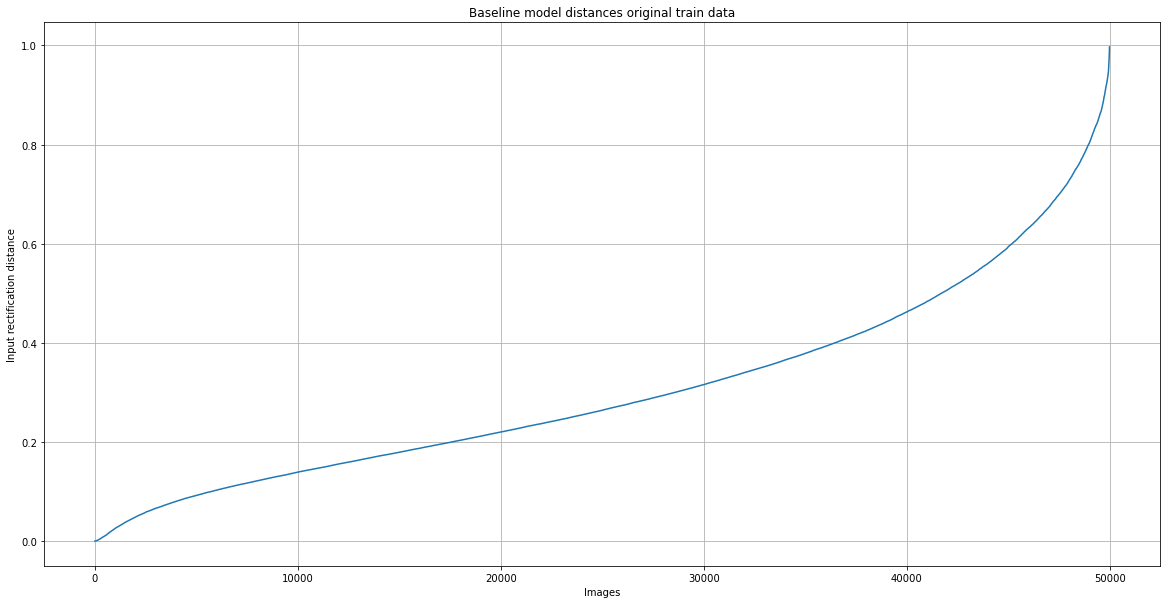

In [15]:
# Train Loader
plt.figure(figsize=(20,10))
plt.plot(np.sort(differences_test))
plt.title("Baseline model distances original train data")
plt.xlabel("Images")
plt.ylabel("Input rectification distance")
plt.grid()

In [20]:
print(np.max(differences_test))
print(np.min(differences_test))
print(np.mean(differences_test))

0.996910810470581
1.430511474609375e-06
0.30630544888440436


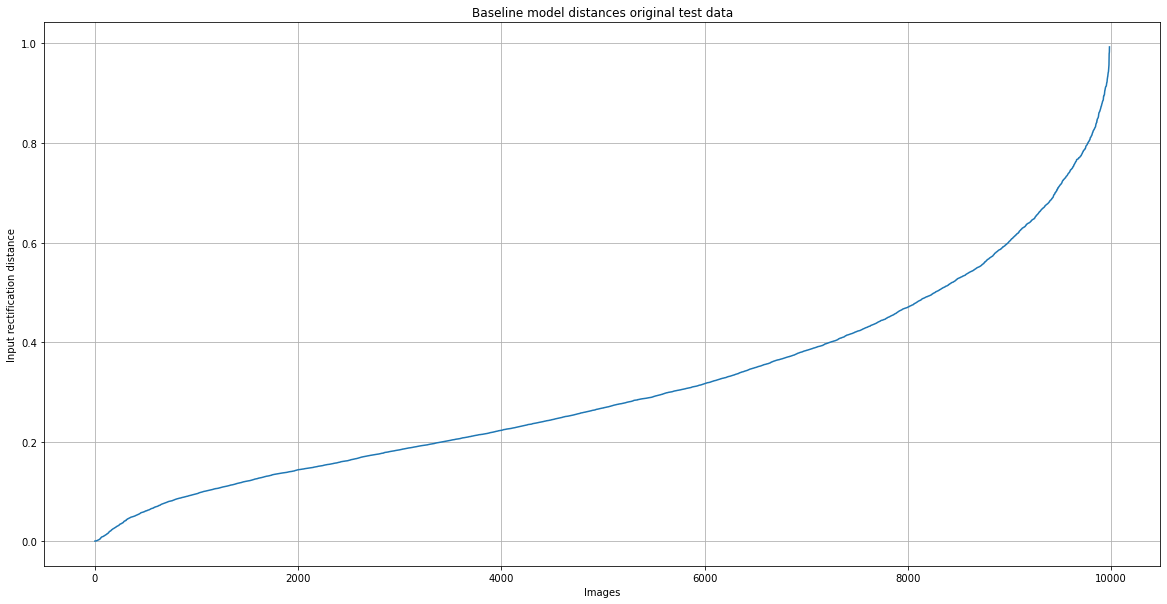

In [17]:
# Test Loader
plt.figure(figsize=(20,10))
plt.plot(np.sort(differences_test))
plt.title("Baseline model distances original test data")
plt.xlabel("Images")
plt.ylabel("Input rectification distance")
plt.grid()

In [18]:
print(np.max(differences_test))
print(np.min(differences_test))
print(np.mean(differences_test))

0.9931092858314514
1.7523765563964844e-05
0.31005992540429783


In [28]:
print("Attacking Train Loader for estimating optimal threshold value t")
print("##############################################################################")
print("##############################################################################")
print("##############################################################################")

differences_test,adversarial_map=evaluate_baseline(train_loader,network,is_attack=True,attack=fb.attacks.FGSM(),epsilon=[0.1],t=1.0)
print("Choosing t-calculating strategy for optimal value t")
print("##############################################################################")
print("##############################################################################")
print("##############################################################################")
t=calculate_threshold_adversarial(differences_test,adversarial_map,correction_t=1.0,print_output=True)

print("Attacking Test Loader with estimated threshold value t")
print("##############################################################################")
print("##############################################################################")
print("##############################################################################")
differences_test,adversarial_map=evaluate_baseline(test_loader,network,is_attack=True,attack=fb.attacks.FGSM(),epsilon=[0.1],t=t)

Attacking Train Loader for estimating optimal threshold value t
##############################################################################
##############################################################################
##############################################################################

Test set: Avg. loss: 0.0007, Accuracy: 9921/10000 (99%)

Attack Mode!


KeyboardInterrupt: 

0.9999460577964783
8.114402483272443e-09
0.43239533577457395
##########
0.9958803057670593
8.821487426757812e-06
0.36537019806216436
Max Score: 1366
Min Score: -1070
Mean Score: 174.0
##########
Evaluated legitimate mean calculation as best threshold for t
True T Distance:  -1070
True T Adaptive:  226
True T Legitimate Mean:  1366
Detection Ratio True T Distance:  -5477.189986589182
Detection Ratio False T Distance:  61.7679928475637
Detection Ratio True T Adaptive:  -4821.948144836835
Detection Ratio False T Adaptive:  54.52615109521681
Detection Ratio True T Mean:  -4245.578006258382
Detection Ratio False T Mean:  48.156012516763525


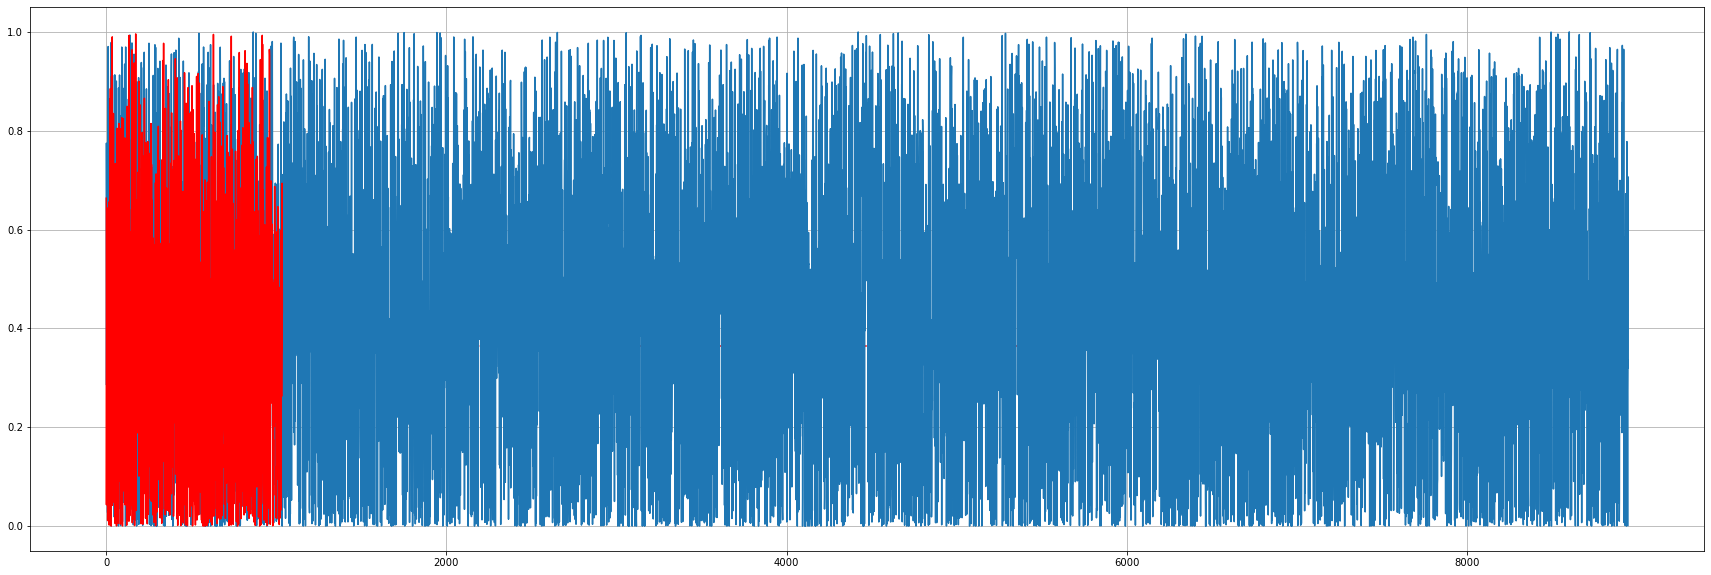

0.36537019806216436
Legitimate Samples  1036
Adversarial Samples  8948
True Negatives  541
False Positives  495
True Positives  5134
False Negatives 3814
##########
Detection Ratio TP:  57.37594993294591
Detection Ratio FN:  42.62405006705409
Detection Ratio TN:  52.22007722007722
Detection Ratio FP:  47.77992277992278


0.36537019806216436

In [671]:
calculate_threshold_adversarial(differences_test,adversarial_map,correction_t=1.0,print_output=True,is_attack=True)

In [13]:
differences_test,adversarial_map=evaluate_baseline(test_loader,network,is_attack=True,attack=fb.attacks.FGSM(),epsilon=[1],t=0,median_kernel=3)


Test set: Avg. loss: 0.0006, Accuracy: 9924/10000 (99%)

Attack Mode!

Test set: Avg. loss baseline: 0.0567, Accuracy: 62.68000030517578/10000 (63%), Accuracy_Median_Smooth: 61.36000061035156, Accuracy_Bit_Reduction: 91.16999816894531, Accuracy_Jury_Ensemble: 68.09, Accuracy_Pooled_Ensemble: 81.19999694824219, Threshold t Baseline: 0, False Positives Baseline: 0, True Negatives Baseline: 0, Pertubated Samples Detected: 3716, Pertubated Samples Real: 3716

Attack Success (Pooled): 0.3631233870983124

Detection Accuracy 100.0%
L0 Distance: 13.817639473157051
L2 Distance: 0.6160080287701044
Linf Distance: 2.756987167474551


In [81]:
network.load_state_dict(torch.load('../src/results/model_integrated_ens_cifar.pth'))
print('Loaded integrated adversarial trained ensemble model for cifar from file')
optimizer.load_state_dict(torch.load('../src/results/optimizer_integrated_cifar.pth'))
print('Loaded adversarial trained optimizer from integrated ensemble model for cifar')

Loaded integrated adversarial trained ensemble model for cifar from file
Loaded adversarial trained optimizer from integrated ensemble model for cifar


# Paper related evaluation method

In [13]:
def generate_pertubated_examples(n=100,attack_method=None,epsilon=[0.1],datatype="MNIST"):
    device = torch.device("cpu")
    adversial_data = []
    legitimate_data = []
    legitimate_label = []
    adversial_orignal_labels = []
    collected_ad=0
    collected_leg=0
    model = network.eval()
    print(epsilon)
    for i, data in enumerate(test_loader,0):
         
        input, label = data
        input, label = Variable(input.to(device)), Variable(label.to(device))
            # Generate adversial dataset for attack
        if (datatype=="CIFAR"):
            fmodel = fb.PyTorchModel(model, bounds=(-1.989473819732666, 2.130864143371582), device="cpu") #CIFAR
        else:
            fmodel = fb.PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075), device="cpu") #MNIST
        attack = attack_method
            #attack = fb.attacks.L2CarliniWagnerAttack()
        epsilons = epsilon #, 0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0

        raw_advs, advs, is_adv = attack(fmodel, input, label, epsilons=epsilons)
        adversarial_indexes = np.where((is_adv[0].cpu().view(-1).numpy()).astype(int)==1)
        legitimate_indexes = np.where((is_adv[0].cpu().view(-1).numpy()).astype(int)==0)
        #print (adversarial_indexes)
        for adversarials in range(len(adversarial_indexes[0])):
            if collected_ad==n:
                break
            #print(adversarials)
            adversial_orignal_labels.append(label[adversarial_indexes[0][adversarials]])
            adversial_data.append(advs[0][adversarial_indexes[0][adversarials]])
            collected_ad+=1
        for legitimates in range(len(legitimate_indexes[0])):
            if collected_leg==n:
                break
            legitimate_label.append(label[legitimate_indexes[0][legitimates]])
            legitimate_data.append(input[legitimate_indexes[0][legitimates]])
            collected_leg+=1
        if (collected_leg==n and collected_ad==n):
            break
    if(collected_leg!=n):
        print("Not enough legitimate samples")
    if(collected_ad!=n):
        print("Not enough adversarial samples")
    
    print(adversial_data[0].shape)
    if (datatype=="CIFAR"):
        return (adversial_data,torch.from_numpy(np.array(adversial_orignal_labels)),legitimate_data,torch.from_numpy(np.array(legitimate_label)))
    else:
        return (torch.cat(adversial_data).unsqueeze(dim=1),torch.from_numpy(np.array(adversial_orignal_labels)),torch.cat(legitimate_data).unsqueeze(dim=1),torch.from_numpy(np.array(legitimate_label)))   #dim1 = mnist

In [12]:
def calculate_mnist (attack_method,epsilon):
    print("#######################")
    print("#######################")
    print("#######################")
    print(attack_method)
    ad_data,ad_label,original_data,original_label = generate_pertubated_examples(n=20,attack_method=attack_method,epsilon=epsilon,datatype="MNIST") #unten
    cut = int(min(len(ad_data),len(original_data))/2)
    print("Train/Test split after {} samples".format(cut))
    data_train = torch.cat((ad_data[0:cut],original_data[0:cut]),dim=0) #! MNIST, CIFAR deactivate line
    label_train = torch.cat((ad_label[0:cut],ad_label[0:cut]),dim=0)

    if (len(ad_data)<=len(original_data)):
        data_test = torch.cat((ad_data[cut:len(ad_data)],original_data[cut:len(ad_data)]),dim=0) #! MNIST
        label_test = torch.cat((ad_label[cut:len(ad_data)],ad_label[cut:len(ad_data)]),dim=0)
    else:
        data_test = torch.cat((ad_data[cut:len(original_data)],original_data[cut:len(original_data)]),dim=0) #! MNIST
        label_test = torch.cat((ad_label[cut:len(original_data)],ad_label[cut:len(original_data)]),dim=0)
    differences,adversarial_map=evaluation_paper(data_train,label_train,network=network,datatype="MNIST")
    t_value=calculate_threshold_adversarial(differences,adversarial_map,correction_t=1.0,print_output=True)
    differences=evaluation_paper(data_test,label_test,network,t_value,evaluate=True,datatype="MNIST")
# CIFAR

In [14]:
#calculate_mnist(fb.attacks.FGSM(),[0.1])
#calculate_mnist(fb.attacks.FGSM(),[0.5])
#calculate_mnist(fb.attacks.FGSM(),[1])
#
#calculate_mnist(fb.attacks.FGM(),[0.1])
#calculate_mnist(fb.attacks.FGM(),[0.5])
#calculate_mnist(fb.attacks.FGM(),[1])
#
#calculate_mnist(fb.attacks.PGD(),[0.1])
#calculate_mnist(fb.attacks.PGD(),[0.5])
#calculate_mnist(fb.attacks.PGD(),[1])
#
#calculate_mnist(fb.attacks.L2PGD(),[0.1])
#calculate_mnist(fb.attacks.L2PGD(),[0.5])
#calculate_mnist(fb.attacks.L2PGD(),[1])
#
#calculate_mnist(fb.attacks.deepfool.L2DeepFoolAttack(),[0.1])
#calculate_mnist(fb.attacks.deepfool.L2DeepFoolAttack(),[0.5])
#calculate_mnist(fb.attacks.deepfool.L2DeepFoolAttack(),[1])
calculate_mnist(fb.attacks.carlini_wagner.L2CarliniWagnerAttack(),[0.1])
calculate_mnist(fb.attacks.carlini_wagner.L2CarliniWagnerAttack(),[0.5])
calculate_mnist(fb.attacks.carlini_wagner.L2CarliniWagnerAttack(),[1])

#######################
#######################
#######################
L2CarliniWagnerAttack(binary_search_steps=9, steps=10000, stepsize=0.01, confidence=0, initial_const=0.001, abort_early=True)
[0.1]


KeyboardInterrupt: 

##########################

In [38]:
ad_data,ad_label,original_data,original_label = generate_pertubated_examples(n=200,attack_method=fb.attacks.FGSM(),epsilon=[2],datatype="CIFAR") #unten

[2]
torch.Size([3, 28, 28])


In [117]:
ad_data.shape

torch.Size([134, 1, 28, 28])

In [118]:
original_data.shape

torch.Size([200, 1, 28, 28])

### FOR CIFAR!

In [34]:
x = ad_data
y = original_data
train_data_adv = torch.empty(0,3,28,28)
train_data_orig = torch.empty(0,3,28,28)

for i in range(100):
    train_data_adv = torch.cat((train_data_adv,x[i].reshape(1,3,28,28)),dim=0)
for i in range(100):
    train_data_orig = torch.cat((train_data_orig,y[i].reshape(1,3,28,28)),dim=0)
#! This
train_data = torch.cat((train_data_adv,train_data_orig),dim=0)

########

x = ad_data
y = original_data
test_data_adv = torch.empty(0,3,28,28)
test_data_orig = torch.empty(0,3,28,28)
for i in range(100,200):
    test_data_adv = torch.cat((test_data_adv,x[i].reshape(1,3,28,28)),dim=0)
for i in range(100,200):
    test_data_orig = torch.cat((test_data_orig,y[i].reshape(1,3,28,28)),dim=0)
test_data = torch.cat((test_data_adv,test_data_orig),dim=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


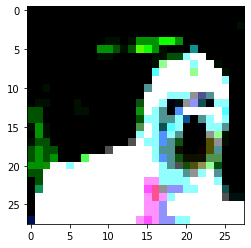

In [26]:
original_data[0].shape
plt.imshow(np.transpose(bit_reduction(train_data[66]), axes=[1, 2, 0]))

In [35]:
#data_com = torch.cat((ad_data,original_data),dim=1) #dim0 for mnist, dim1 for cifar
#label_com = torch.cat((ad_label,original_label),dim=0)

cut = int(min(len(ad_data),len(original_data))/2)
print("Train/Test split after {} samples".format(cut))
#data_train = torch.cat((ad_data[0:cut],original_data[0:cut]),dim=0) #! MNIST, CIFAR deactivate line
label_train = torch.cat((ad_label[0:cut],ad_label[0:cut]),dim=0)

if (len(ad_data)<=len(original_data)):
 #   data_test = torch.cat((ad_data[cut:len(ad_data)],original_data[cut:len(ad_data)]),dim=0) #! MNIST
    label_test = torch.cat((ad_label[cut:len(ad_data)],ad_label[cut:len(ad_data)]),dim=0)
else:
 #   data_test = torch.cat((ad_data[cut:len(original_data)],original_data[cut:len(original_data)]),dim=0) #! MNIST
    label_test = torch.cat((ad_label[cut:len(original_data)],ad_label[cut:len(original_data)]),dim=0)
# CIFAR
#print(data_train.shape)
#data_train=data_train.reshape(100,3,28,28)
#print(data_train.shape)

Train/Test split after 100 samples


In [16]:
len(data_test)

98

In [18]:
def evaluation_paper(dataset, labelset, network, t=0.01, evaluate=False, datatype="MNIST"):
    differences = []
    is_attack = True
    pertubated_detected = 0
    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0
    # if (datatype=="CIFAR"):
    # dataset=dataset.reshape(100,3,28,28)
    for i, (data, target) in enumerate(zip(dataset, labelset), 0):
        if (datatype == "MNIST"):
            data = data.unsqueeze(dim=1)
        if (datatype == "CIFAR"):
            print(data.shape)
            data = data.reshape(1, 3, 28, 28)
        with torch.no_grad():
            output = network(data)
            # Output median smoothed ensemble
            median_smoothed_batch = torch.clone(data)
            median_smoothed_batch = median_smoothing(
                median_smoothed_batch, kernel_size=2)
            output_ms = network(median_smoothed_batch)
            # Output bit reduced ensemble
            bit_reduced_batch = torch.clone(data)
            bit_reduced_batch = bit_reduction(bit_reduced_batch, bit=1)
            output_br = network(bit_reduced_batch)
            # Test accuracy
            pred = output.data.max(1, keepdim=True)[1]
            pred_ms = output_ms.data.max(1, keepdim=True)[1]
            pred_br = output_br.data.max(1, keepdim=True)[1]

            # Average of three networks. Alternative is to use majority voting using output.data.max(1)[1] for each output and write it to an array to get argmax
            output_ens = (output + output_ms + output_br)/3
            pred_ens = output_ens.data.max(1, keepdim=True)[1]

            softmax_baseline = F.softmax(output, dim=1)
            softmax_median_smooth = F.softmax(output_ms, dim=1)
            softmax_bitreduction = F.softmax(output_br, dim=1)
            #!
            #!
            # if (i==49):
            #        plt.imshow(np.transpose(data.reshape(3,28,28), axes=[1, 2, 0]))
            #        plt.show()
            # if (i==50):
            #        plt.imshow(np.transpose(data.reshape(3,28,28), axes=[1, 2, 0]))
            #        plt.show()
            #!
            # Jury Vote for ensemble predictions
            for x in range(len(pred)):

                # Calculate distance between baseline and rectificated softmax outputs
                difference_ms = abs(
                    (softmax_baseline[x])-(softmax_median_smooth[x]))
                difference_br = abs(
                    (softmax_baseline[x])-(softmax_bitreduction[x]))

                distance_list = [max(difference_br).item(),
                                 max(difference_ms).item()]
                #difference_total = statistics.fmean(distance_list)
                difference_total = max(distance_list)
                # print(difference_total)
                # print(i)
                #print("Max Tensor Distance:", difference_total)
                differences.append(difference_total)
                if (evaluate):
                    if ((difference_total > t) and (i <= (len(dataset)/2)-1)):
                        true_positive += 1
                    if ((difference_total > t) and (i > (len(dataset)/2)-1)):
                        false_positive += 1
                    if ((difference_total < t) and (i <= (len(dataset)/2)-1)):
                        false_negative += 1
                    if ((difference_total < t) and (i > (len(dataset)/2)-1)):
                        true_negative += 1
    if (evaluate):
        print("True Positives:", true_positive)
        print("False Positives:", false_positive)
        print("True Negatives:", true_negative)
        print("False Negatives:", false_negative)

        print("Accuracy:", (true_positive+true_negative) /
              (true_positive+true_negative+false_negative+false_positive))
    else:
        print("Calculated train dataset distances")
    a = [0]*int((len(dataset)/2))
    b = [1]*int((len(dataset)/2))
    c = b + a
    return(differences, c)


In [43]:
differences,adversarial_map=evaluation_paper(train_data,label_train,network=network,datatype="CIFAR")
#data_train = MNIST
#train_data = CIFAR!

torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 2

Text(0, 0.5, 'Distance')

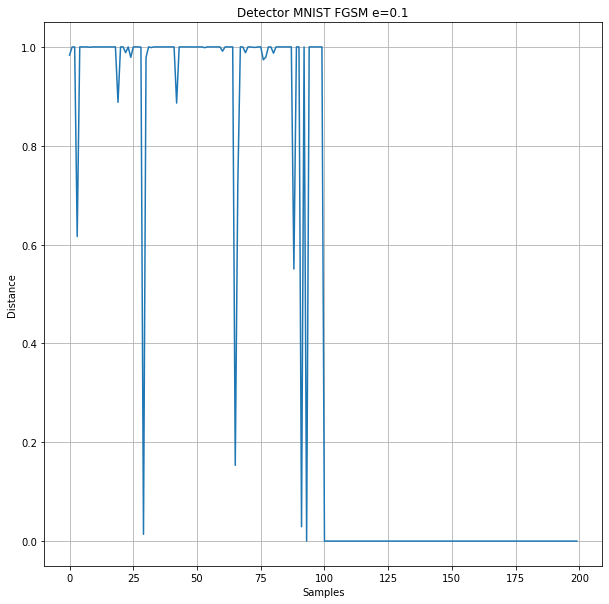

In [112]:
plt.figure(figsize=(10,10))
plt.plot(differences)
plt.grid()
plt.title("Detector MNIST FGSM e=0.1")
plt.xlabel("Samples")
plt.ylabel("Distance")

0.7948414087295532
0.07521967589855194
0.3418108592182398
##########
0.7933154106140137
0.001488029956817627
0.1567373663187027
Distance t legitimate mean: 0.1567373663187027
Distance t min-max: 0.4342675432562828
Distance t conservative mean: 0.29550245478749276
Score legitimate mean: 112
Score min-max: 40
Score conservative mean: 76
##########
Max Score: 112
Min Score: 40
Mean Score: 76.0
##########
Evaluated legitimate mean calculation as best threshold for t
True T Distance:  40
True T Adaptive:  76
True T Legitimate Mean:  112
Detection Ratio True T Distance:  40.0
Detection Ratio False T Distance:  80.0
Detection Ratio True T Adaptive:  76.0
Detection Ratio False T Adaptive:  62.0
Detection Ratio True T Mean:  112.0
Detection Ratio False T Mean:  44.0


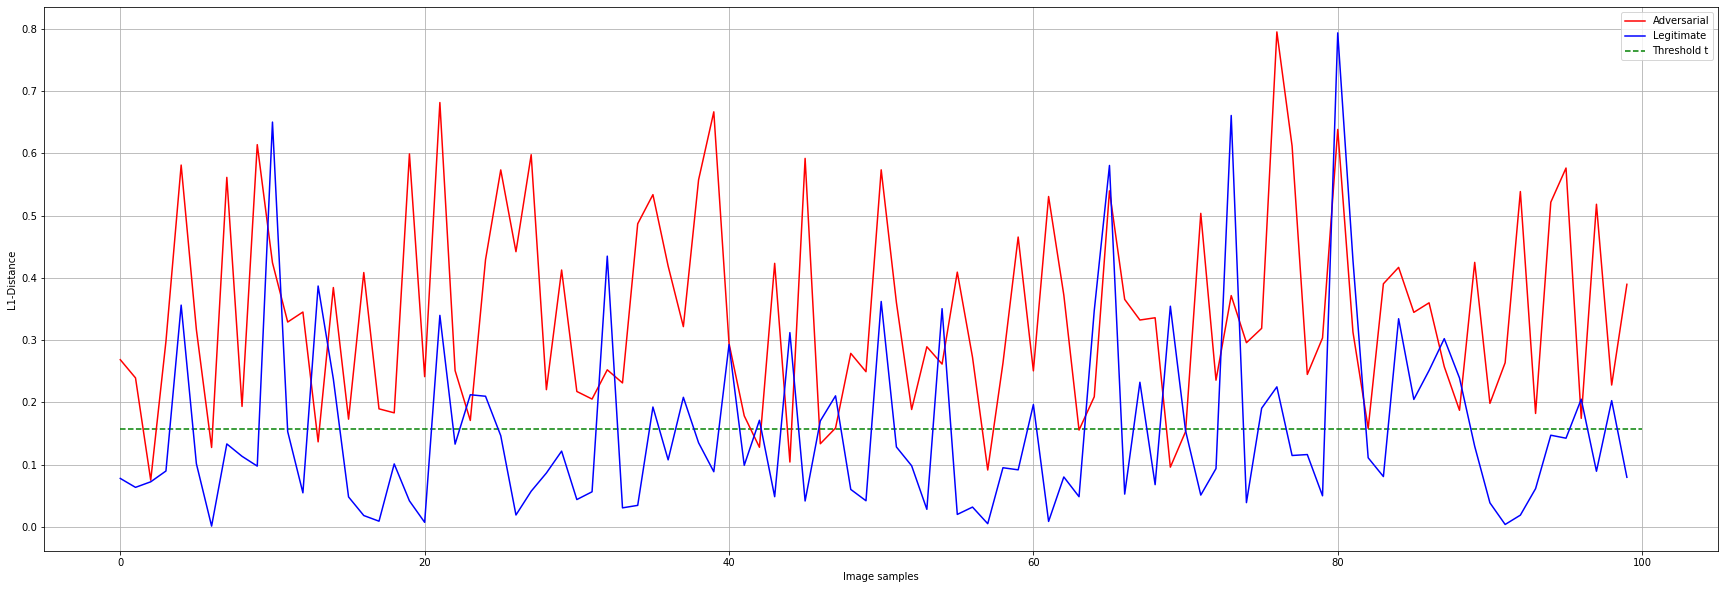

0.1567373663187027
Legitimate Samples  100
Adversarial Samples  100
True Negatives  66
False Positives  34
True Positives  90
False Negatives 10
##########
Detection Ratio TP:  90.0
Detection Ratio FN:  10.0
Detection Ratio TN:  66.0
Detection Ratio FP:  34.0


In [50]:
t_value=calculate_threshold_adversarial(differences,adversarial_map,correction_t=1.0,print_output=True)

In [122]:
differences=evaluation_paper(data_test,label_test,network,t_value,evaluate=True,datatype="MNIST")

True Positives: 63
False Positives: 1
True Negatives: 66
False Negatives: 4
Accuracy: 0.9626865671641791


# Test site

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

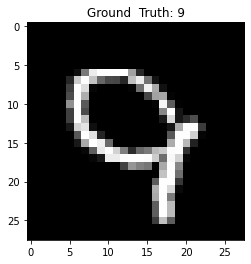

In [125]:
plt.imshow(f_d[0][0], cmap='gray', interpolation='none')
plt.title("Ground  Truth: {}".format(e_d[0]))
plt.plot


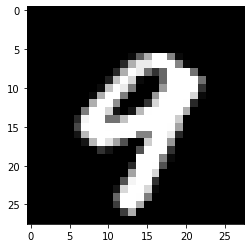

In [55]:
plt.imshow(ndimage.median_filter(f_d[0][0], size=2), cmap='gray', interpolation='none')

2


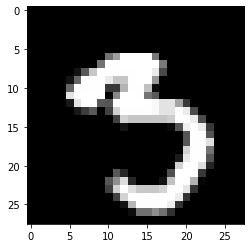

In [167]:
plt.imshow(median_smoothing(f_d[0][0]), cmap='gray', interpolation='none')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

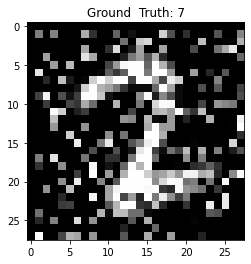

In [258]:
plt.imshow(pertubated_image[0][0], cmap='gray', interpolation='none')
plt.title("Ground  Truth: {}".format(e_d[5]))
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

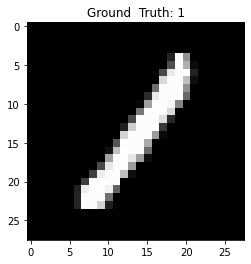

In [78]:
plt.imshow(x_d[5][0], cmap='gray', interpolation='none')
plt.title("Ground  Truth: {}".format(e_d[5]))
plt.plot

In [163]:
median_smoothed = median_smoothing(f_d)
scaled_data = bit_reduction(f_d)
pertubated_image = perturbate_image(p_d,mode='random') #Pertubations seems to make in-place operations so use different tensor

In [189]:
x_d,e_d=extract_dataloader_images(0)
f_d=torch.clone(x_d)
p_d=torch.clone(x_d)

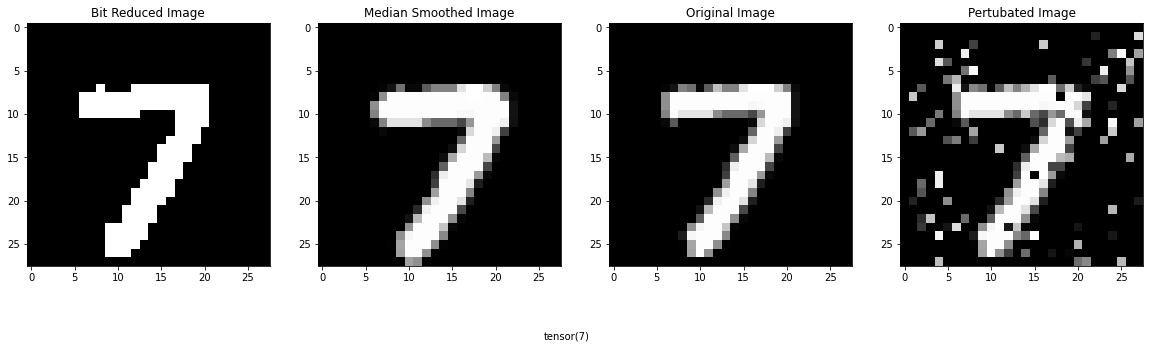

In [164]:
batch_nr = 0
fig = plt.figure()

ax1 = fig.add_subplot(141)  # left side
ax2 = fig.add_subplot(142)  # right side
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
ax1.title.set_text("Bit Reduced Image")
ax2.title.set_text("Median Smoothed Image")
ax3.title.set_text("Original Image")
ax4.title.set_text("Pertubated Image")
ax1.imshow(scaled_data[batch_nr][0], cmap='gray', interpolation='none')
ax2.imshow(median_smoothed[batch_nr][0], cmap='gray', interpolation='none')
ax3.imshow(x_d[batch_nr][0], cmap='gray', interpolation='none')
ax4.imshow(pertubated_image[batch_nr][0], cmap='gray', interpolation='none')
fig.text(.5, .05, e_d[batch_nr], ha='center')
fig.set_figheight(6)
fig.set_figwidth(20)
#plt.title("Ground  Truth: {}".format(e_d[batch_nr]))
plt.show()

# Tst perturbated example

Model predicted: tensor([2])
Model predicted median smoothed: tensor([2])
Model predicted scaled: tensor([2])
##################################################################
Model predicted tensor value: 19.3311767578125
Model predicted median smoothed tensor value: 19.64731216430664
Model predicted scaled tensor value: 19.95734405517578
##################################################################
Model real: 2
Sum pixel: 784
Pertubated pixel: 95
Percent preturbated: 0.1211734693877551


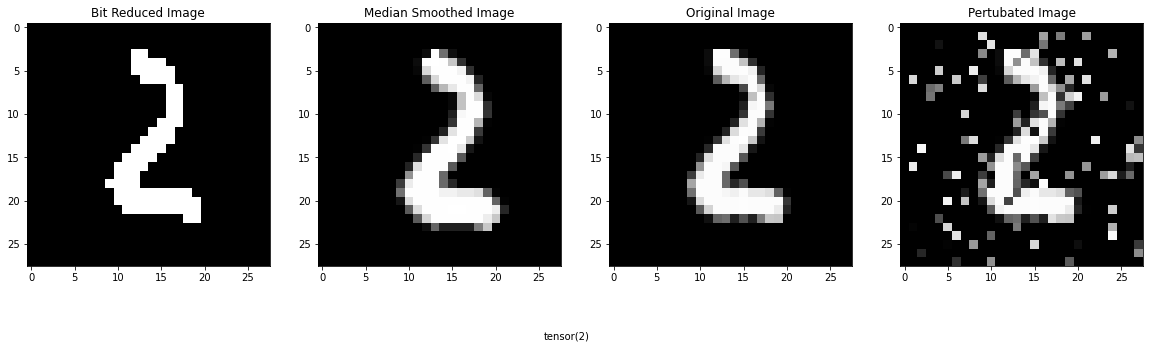

In [462]:
x_d,e_d=extract_dataloader_images(0)
f_d=torch.clone(x_d)
p_d=torch.clone(x_d)
#networks= (network,network2,network3)

pertubated_image = perturbate_image(p_d,mode='random') #Pertubations seems to make in-place operations so use different tensor
image = f_d
fake_tst = test_fake(image,network)

median_smoothed = median_smoothing(image)
scaled_data = bit_reduction(image)


fake_tst_median = test_fake(median_smoothed,network)
fake_tst_scaled = test_fake(scaled_data,network)


p_percent,p_size,p_pertubated=count_perturbated_pixel(x_d,pertubated_image)
print("Model predicted: {}".format(fake_tst.data.max(1, keepdim=True)[1][0]))
print("Model predicted median smoothed: {}".format(fake_tst_median.data.max(1, keepdim=True)[1][0]))
print("Model predicted scaled: {}".format(fake_tst_scaled.data.max(1, keepdim=True)[1][0]))

print("##################################################################")
print("Model predicted tensor value: {}".format(fake_tst.data.max(1)[0][0]))
print("Model predicted median smoothed tensor value: {}".format(fake_tst_median.data.max(1)[0][0]))
print("Model predicted scaled tensor value: {}".format(fake_tst_scaled.data.max(1)[0][0]))

print("##################################################################")
print("Model real: {}".format(e_d[0]))
print("Sum pixel: {}".format(p_size))
print("Pertubated pixel: {}".format(p_pertubated))
print("Percent preturbated: {}".format(p_percent))

####

batch_nr = 0
fig = plt.figure()

ax1 = fig.add_subplot(141)  # left side
ax2 = fig.add_subplot(142)  # right side
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
ax1.title.set_text("Bit Reduced Image")
ax2.title.set_text("Median Smoothed Image")
ax3.title.set_text("Original Image")
ax4.title.set_text("Pertubated Image")
ax1.imshow(scaled_data[batch_nr][0], cmap='gray', interpolation='none')
ax2.imshow(median_smoothed[batch_nr][0], cmap='gray', interpolation='none')
ax3.imshow(x_d[batch_nr][0], cmap='gray', interpolation='none')
ax4.imshow(pertubated_image[batch_nr][0], cmap='gray', interpolation='none')
fig.text(.5, .05, e_d[batch_nr], ha='center')
fig.set_figheight(6)
fig.set_figwidth(20)
#plt.title("Ground  Truth: {}".format(e_d[batch_nr]))
plt.show()


In [32]:
%run "c:\GIT\Programme\code\Master\Koch\Robustness of Generative Adversial Networks\src\Models\upgraded_net_hook.py"

In [31]:
%run "c:\GIT\Programme\code\Master\Koch\Robustness of Generative Adversial Networks\src\functions\f2d.py"

upgraded_net_hook.nn

Train:


AttributeError: module 'upgraded_net_hook' has no attribute 'ResNet20'